# Capstone Project: Airline Passenger Satisfaction Prediction

## Objective
- **The objective or goal of this project is to guide an airlines company to determine the important factors that influences the customer or passenger satisfaction.**
- **Customer satisfaction plays a major role in affecting the business of a company therefore analyzing and improving the factors that are closely related to customer satisfaction is important for the growth and reputation of a company.**

## Dataset Information
- The dataset for this project is obtained from Kaggle which contains the data sourced from a survey conducted by airlines on the satisfaction level of passengers/customers based on various factors. 
- The dataset consists of 23 columns such as Age, Gender, Travel class, Arrival and Departure delays and also features that influences customer satisfaction level such as On-board service, Cleanliness, Seat comfort, Baggage handling etc.
- The dataset consists of a column or feature named ‘satisfaction’ which describes the overall satisfaction level of the customer. It has two values, ‘neutral or dissatisfied’ and ‘satisfied’. 
- This satisfaction feature is considered as the label feature since it conveys the overall experience of the customer based on the ratings given for other features.

>Dataset url: https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction


## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_data)**
3. **[Data Analysis](#data_analysis)**
    - 3.1 - **[Understand the Data](#Data_Understanding)**
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Summary Statistics](#Summary_Statistics)
        - 3.1.4 - [Checking for missing values](#miss)
    - 3.2 - **[Missing Values Treatment](#Missing_Values)**
    - 3.3 - **[Statistical Tests](#statistical_test)**
         - 3.3.1 - [Categorical vs Target Variable](#cat_vs_tar)
         - 3.3.2 - [Numerical vs Target Variables](#num_vs_tar)
    - 3.4 - **[Checking For Outliers](#outliers)**
    - 3.5 - **[EDA](#eda)**
        - 3.5.1 - [Univariate Analysis](#uni)
        - 3.5.2 - [Bivariate Analysis](#bi)
        - 3.5.3 - [Multivariate Analysis](#mul)
4. **[Data Pre-Processing](#data)**
     - 4.1 - [Transforming Data](#trans)
     - 4.2 - [One-hot Encoding](#onehot)
     - 4.3 - [Train Test Split](#trts)
5. **[Model Building](#model)**
    - 1 - [Logistic Regression Model](#lr)
    - 2 - [Gaussian Naive Bayes](#gnb)
    - 3 - [KNeighbors Classifier](#knn)
    - 4 - [DecisionTree Classifier](#dt)
    - 5 - [Random Forest Classifier](#rf)
    - 6 - [AdaBoost Classifier](#ab)
6. **[Hyper parameter tuning for Random Forest Classifier](#tunerf)**
7. **[Hyperparameter Tunning For KNN Classifier](#tuneknn)**
8. **[Hyperparameter Tunning For Decision Tree Classifier](#tunedt)**
9. **[Bar Plot For Precision Score For Each Modal](#plot)**

<a id="import_lib"></a>
# 1. Importing Libraries

In [11]:
# importing mnupulating and mathematical library

import numpy as np
import pandas as pd

# importing plotting libraries

from matplotlib.colors import ListedColormap
import klib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing warnings library

import warnings
warnings.filterwarnings('ignore')

# importing statistical library

import statsmodels.stats.api as sm
from scipy.stats import chi2_contingency

# importing model builiding libraries

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report,precision_score, recall_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# importing pickle library

import pickle

In [1]:
# setting display size for rows and columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

<a id="Read_Data"></a>
# 2. Loading Dataset

In [12]:
df=pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
#df.drop('Unnamed: 0',axis=1,inplace=True)
#df.head()

<a id="data_analysis"></a>
# 3. Data Analysis

<a id="Data_Understanding"></a>
## 3.1 Data Understanding

<a id="Data_Shape"></a>
### 3.1.1 Shape of The Dataset

In [6]:
df.shape 

(129880, 23)

<a id="Data_Types"></a>
### 3.1.2 Info of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

<a id="Summary_Statistics"></a>
### 3.1.3 Five Point Summary For The Dataset (Numerical Columns)

In [8]:
df.describe(include=np.number).T

NameError: name 'np' is not defined

<a id="miss"></a>
### 3.1.4 Checking For Null Values

In [14]:
x=df.isna().sum()
y=df.isna().sum()/len(df)*100
null_c=pd.concat([x,y],axis=1,keys=['null_value_sum','null_value_percentage'])
null_c

,null_value_sum,null_value_percentage
Gender,0,0.000000
customer_type,0,0.000000
age,0,0.000000
type_of_travel,0,0.000000
customer_class,0,0.000000
flight_distance,0,0.000000
inflight_wifi_service,0,0.000000
departure_arrival_time_convenient,0,0.000000
ease_of_online_booking,0,0.000000
gate_location,0,0.000000


<a id="Missing_Values"></a>
## 3.2 Missing Value Treatment

In [10]:
null_c[null_c['null_value_percentage']>0]

,null_value_sum,null_value_percentage
arrival_delay_in_minutes,393,0.302587


there is only one feature in the dataset which contains null values. And i.e., arrival_delay_in_minutes. Now we will check for the distribution of the arrival_delay_in_minutes feature.

In [ ]:
plt.figure(figsize=(18,5))
sns.distplot(df['arrival_delay_in_minutes'])
plt.show()

The distribution of arrival_delay_in_minutes appear to be right skewed. Therfore we cant go ahead with mean imputation as it will be impacted through outliers.
Now we will check for the median value i.e., positional centre of the data.

In [ ]:
df['arrival_delay_in_minutes'].median()

As we see that the median value for 'arrival_delay_in_minutes' feature is 0. We can't go ahead with median imputation too. As we think logically imputing null values with 0 for this feature doesn't have any solid proof.

So now we will go ahead and use the KNN Imputer to impute the null values for the feature 'arrival_delay_in_minutes'.

### KNN Imputation

In [15]:
from sklearn.impute import KNNImputer
knn_imp=KNNImputer()

cat_cols=df.drop('satisfaction',axis=1).select_dtypes(object)
con_cols=df.select_dtypes(np.number)
X=pd.concat([con_cols,pd.get_dummies(cat_cols,drop_first=True)],axis=1)
X.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,0


In [16]:
df1=pd.DataFrame(knn_imp.fit_transform(X,X['arrival_delay_in_minutes']),columns=X.columns)
df1.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,1.0,0.0,1.0,0.0,1.0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,0.0,0.0,0.0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0.0,0.0,0.0,0.0,0.0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1.isna().sum()

In [18]:
cmp=pd.concat([df['departure_delay_in_minutes'],df['arrival_delay_in_minutes'],df1['arrival_delay_in_minutes']],axis=1)
cmp[cmp.iloc[:,1].isna()==True]

,departure_delay_in_minutes,arrival_delay_in_minutes,arrival_delay_in_minutes
213,31,NaN,28.8
1124,38,NaN,29.6
1529,11,NaN,22.4
2004,41,NaN,23.0
2108,1,NaN,1.4
...,...,...,...
127976,26,NaN,25.0
128037,19,NaN,17.0
128205,0,NaN,2.0
129032,0,NaN,0.0


In [21]:
df.isna().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [22]:
df1.isna().sum()

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
dtype: int64

In [23]:
df['arrival_delay_in_minutes']=df1['arrival_delay_in_minutes']

In [24]:
df.isna().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

comparing the data for arrival_delay_in_minutes and departure_delay_in_minutes before and after imputation.

### Checking For Any Irrelevant Value In Any Column

In [25]:
for cols in df1.columns:
    print(f'for feature:- {cols}')
    print(df1[cols].value_counts())

for feature:- age
39.0    3692
25.0    3511
40.0    3209
44.0    3104
41.0    3089
42.0    3017
43.0    2941
45.0    2939
23.0    2935
22.0    2931
48.0    2889
47.0    2888
37.0    2881
38.0    2878
36.0    2867
24.0    2836
26.0    2822
49.0    2789
27.0    2781
46.0    2771
51.0    2611
52.0    2599
50.0    2579
30.0    2521
29.0    2435
35.0    2398
54.0    2397
53.0    2377
55.0    2339
57.0    2334
33.0    2334
56.0    2310
58.0    2214
59.0    2206
34.0    2198
60.0    2161
28.0    2148
31.0    2007
32.0    1928
21.0    1902
20.0    1878
17.0    1225
18.0    1223
16.0    1156
61.0    1145
19.0    1110
62.0    1071
15.0    1006
63.0     947
65.0     938
64.0     908
66.0     870
14.0     860
9.0      859
11.0     837
67.0     823
68.0     823
10.0     822
13.0     806
69.0     799
8.0      797
12.0     794
70.0     766
7.0      685
72.0     249
71.0     114
80.0     110
77.0     106
75.0      76
73.0      67
74.0      61
76.0      60
79.0      52
78.0      44
85.0      25
Name: a

In [26]:
df1.describe().T # five point summary for numerical columns from new dataset

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
inflight_wifi_service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
online_boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
seat_comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


### Checking for Skewness

In [27]:
skew=df1.skew()
skew[skew>0.5]

flight_distance                    1.108142
departure_delay_in_minutes         6.821980
arrival_delay_in_minutes           6.638487
customer_type_disloyal Customer    1.638879
type_of_travel_Personal Travel     0.824595
customer_class_Eco Plus            3.298370
dtype: float64

In [28]:
cat_cols=df.drop('satisfaction',axis=1).select_dtypes(object)
con_cols=df.select_dtypes(np.number)

In [29]:
con_cols.isna().sum()

age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

In [30]:
print('Categorical_columns:- \n',cat_cols.columns)
print('Numerical_columns:- \n',con_cols.columns)

Categorical_columns:- 
 Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object')
Numerical_columns:- 
 Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')


<a id="statistical_test"></a>
## 3.3 Statistical Tests

<a id="cat_vs_tar"></a>
### 1. Categorical vs Target Variable (Categorical) : - Performing chi2contengency test 

<b>Null Hypothesis, H0: The features are independent</b><br>
<b>Alternate Hypothesis, H1: The features are not independent. (i.e, they are dependent)</b>

In [31]:
a=dict()
for i in cat_cols.columns:
    print(f'{i} vs satisfaction \n')
    observed_value=pd.crosstab(df[i],df['satisfaction'])
    print('observed_value: \n',observed_value)
    print('\n')
    observed_value_per=pd.crosstab(df[i],df['satisfaction'],normalize='index')
    print('observed_value %: \n',observed_value_per)
    print('\n')
    test_stat,p_value,dof,expected_value=chi2_contingency(observed=observed_value,correction=False)
    print('p_value: ',p_value)
    a[i]=p_value
    if p_value<0.05:
        print(f'As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature {i} and satisfaction is related to each other.\n')
    else:
        print(f'As the p-value>0.05, we fail to reject the null hypothesis. And this infers that the feature {i} and satisfaction is not related to each other.\n')

Gender vs satisfaction 

observed_value: 
 satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          37630      28269
Male                            35822      28159


observed_value %: 
 satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                       0.571025   0.428975
Male                         0.559885   0.440115


p_value:  5.135589964552752e-05
As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature Gender and satisfaction is related to each other.

customer_type vs satisfaction 

observed_value: 
 satisfaction       neutral or dissatisfied  satisfied
customer_type                                        
Loyal Customer                       55372      50728
disloyal Customer                    18080       5700


observed_value %: 
 satisfaction       neutral or dissatisfied  satisfied
customer_type          

In [32]:
pd.DataFrame(a.values(),index=a.keys(),columns=['p_value'])

,p_value
Gender,0.000051
customer_type,0.000000
type_of_travel,0.000000
customer_class,0.000000


<a id="num_vs_tar"></a>
### 2. Numerical Columns vs Target Feature (Categorical)

<b>Checking for Normality of Numrical Features</b>
- if feature normally distributed, Performing f_oneway Anova test, else performing kruskal_wallis test

<b>Null Hypothesis, H0: The features are independent</b><br>
<b>Alternate Hypothesis, H1: The features are not independent. (i.e, they are dependent)</b>

In [33]:
from scipy.stats import shapiro, f_oneway, kruskal
#a1=dict()
for cols in con_cols.columns:
    print(f'{cols} vs satisfaction: ')
    test_stat,p_value_s=shapiro(df[cols])
    print(f'Shapiro_test_p_value:- {p_value_s}')
    if p_value_s>0.05:
        print(f'The feature {cols} is normally distributed.')
        # statistical test to check the relationship b/w independent and dependent variable (f-one_way Anova)
        x=df[df['satisfaction']=='neutral or dissatisfied'][cols]
        y=df[df['satisfaction']=='satisfied'][cols]
        test_stat,p_value_f=f_oneway(x,y)
        print(f'f_oneway_p_value:- {p_value_f}')
        a[cols]=p_value_f
        if p_value_f<0.05:
            print(f'As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature {cols} and satisfaction is related to each other.\n')
        else:
            print(f'As the p-value>0.05, we fail to reject the null hypothesis. And this infers that the feature {cols} and satisfaction is not related to each other.\n')
        
    else:
        print(f'The feature {cols} is not normally distributed.')
        # statistical test to check the relationship b/w independent and dependent variable (kruskal)
        x=df[df['satisfaction']=='neutral or dissatisfied'][cols]
        y=df[df['satisfaction']=='satisfied'][cols]
        test_stat,p_value_k=kruskal(x,y)
        print(f'Kruskal_p_value:- {p_value_k}')
        a[cols]=p_value_k
        if p_value_k<0.05:
            print(f'As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature {cols} and satisfaction is related to each other.\n')
        else:
            print(f'As the p-value>0.05, we fail to reject the null hypothesis. And this infers that the feature {cols} and satisfaction is not related to each other.\n')        
    print('\n')

age vs satisfaction: 
Shapiro_test_p_value:- 0.0
The feature age is not normally distributed.
Kruskal_p_value:- 0.0
As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature age and satisfaction is related to each other.



flight_distance vs satisfaction: 
Shapiro_test_p_value:- 0.0
The feature flight_distance is not normally distributed.
Kruskal_p_value:- 0.0
As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature flight_distance and satisfaction is related to each other.



inflight_wifi_service vs satisfaction: 
Shapiro_test_p_value:- 0.0
The feature inflight_wifi_service is not normally distributed.
Kruskal_p_value:- 0.0
As the p-value<0.05, we fail to accept the null hypothesis. And this infers that the feature inflight_wifi_service and satisfaction is related to each other.



departure_arrival_time_convenient vs satisfaction: 
Shapiro_test_p_value:- 0.0
The feature departure_arrival_time_convenient is not n

In [34]:
p_val=pd.DataFrame(a.values(),index=a.keys(),columns=['p_value']).reset_index().rename(columns={'index':'feature'})
p_val

,feature,p_value
0,Gender,5.135590e-05
1,customer_type,0.000000e+00
2,type_of_travel,0.000000e+00
3,customer_class,0.000000e+00
4,age,0.000000e+00
5,flight_distance,0.000000e+00
6,inflight_wifi_service,0.000000e+00
7,departure_arrival_time_convenient,9.557221e-79
8,ease_of_online_booking,0.000000e+00
9,gate_location,2.089159e-01


#### From above statistical test on numerical and categorical features, we can infer that the all features are dependent on target feature i.e., satisfaction.  

<a id="outliers"></a>
## 3.4 Checking for Outliers Using Boxplot

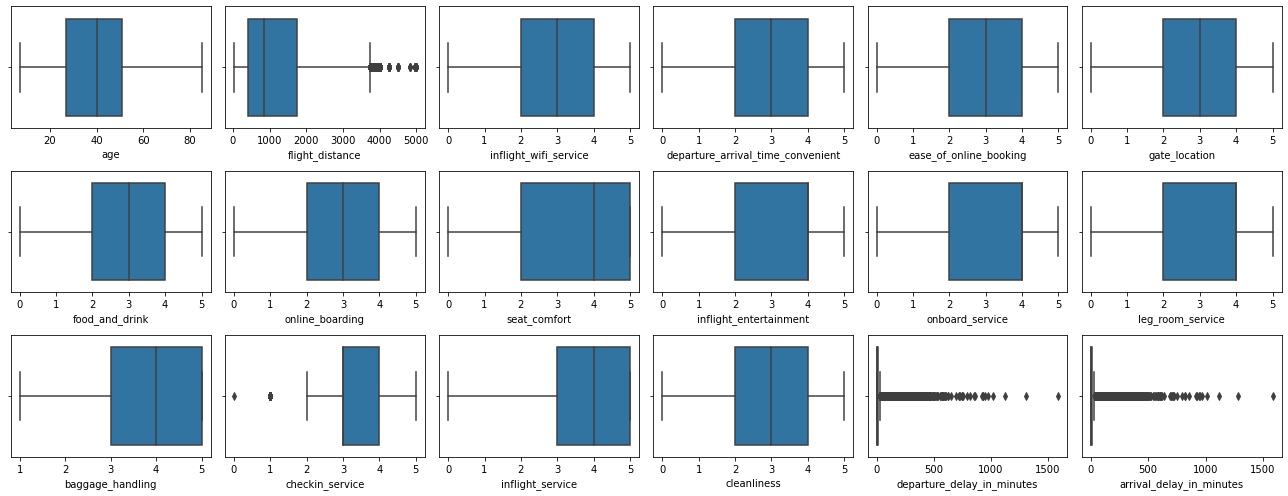

In [36]:
fig,ax=plt.subplots(3,6,figsize=(18,7))
for x,y in zip(con_cols.columns,ax.flatten()):
    sns.boxplot(df[x],ax=y)
plt.tight_layout()
plt.show()

In [37]:
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{col}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [38]:
outlier_check(df[['age','flight_distance','checkin_service','departure_delay_in_minutes','arrival_delay_in_minutes']], 1.5)

age
Number of outliers: 0
Percentage of outliers:     0.000 %

flight_distance
Number of outliers: 2855
Percentage of outliers:     2.198 %

checkin_service
Number of outliers: 16109
Percentage of outliers:    12.403 %

departure_delay_in_minutes
Number of outliers: 18098
Percentage of outliers:    13.934 %

arrival_delay_in_minutes
Number of outliers: 17606
Percentage of outliers:    13.556 %



<a id="eda"></a>
## 3.5 Exploratory Data Analysis

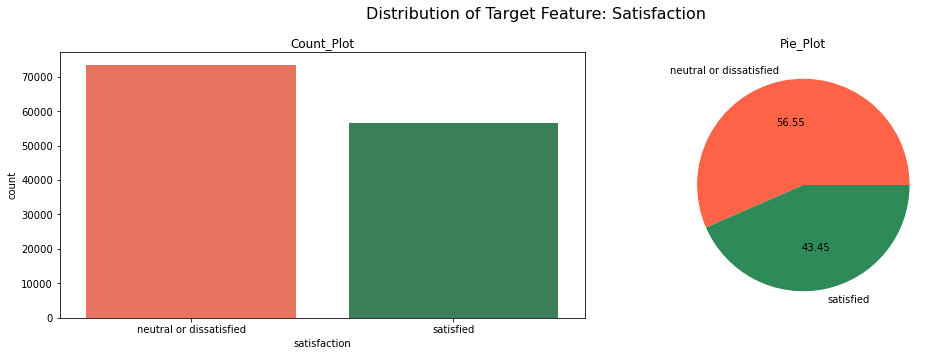

In [39]:
# Analyzing target feature
plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Target Feature: Satisfaction',fontsize=16)
plt.subplot(1, 2, 1)
sns.countplot(df['satisfaction'], palette = ['tomato','seagreen'])
plt.title('Count_Plot')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.title('Pie_Plot')
plt.pie(df["satisfaction"].value_counts(),labels=df['satisfaction'].value_counts().index,autopct='%1.2f',colors=['tomato','seagreen'])
plt.tight_layout()
plt.show()

- On analysing target feature, we can say that the dataset is balanced.
- from the dataset, we can see more passengers are dissatisfied with the current ongoing passenger facing facilities provided by the airline franchise.

<a id="uni"></a>
## Univariate Analysis

#### Performing Univariate Analysis on Categorical Columns

In [40]:
cat_cols.columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class'], dtype='object')

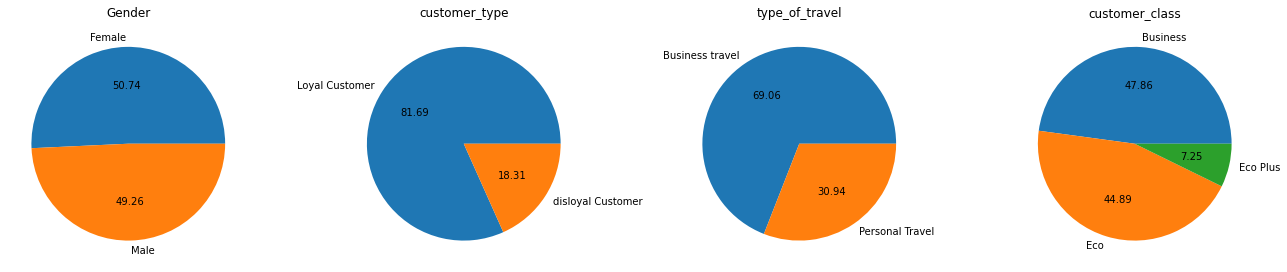

In [41]:
plt.figure(figsize=(18,7))
j=1
for cols in cat_cols.columns:
    plt.subplot(1,4,j)
    plt.title(cols)
    plt.pie(df[cols].value_counts(),labels=df[cols].value_counts().index,autopct='%1.2f')
    j+=1
    
plt.tight_layout()
plt.show()

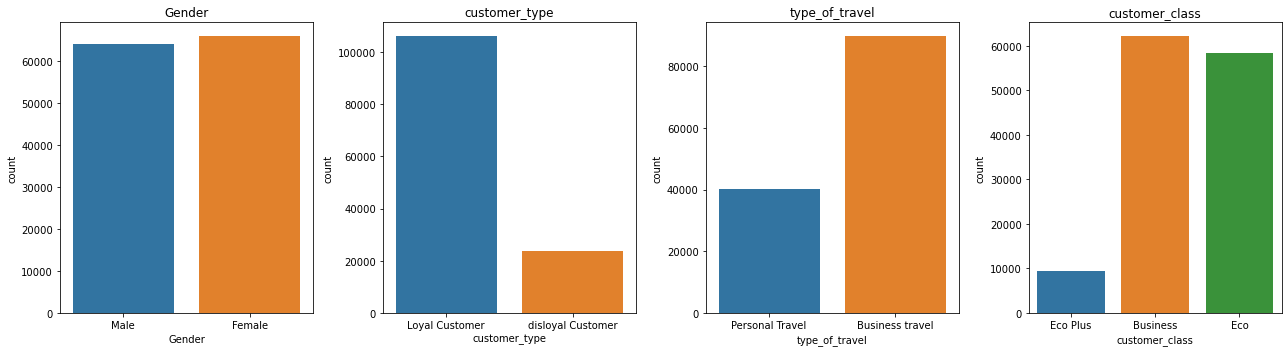

In [42]:
plt.figure(figsize=(18,5))
j=1
for cols in cat_cols.columns:
    plt.subplot(1,4,j)
    plt.title(cols)
    sns.countplot(df[cols])
    j+=1
    
plt.tight_layout()
plt.show()

### Inferences
- The airline franchise is commonly used by both genders male and female. And the gender proprotion for the airline passenger is also similar i.e., 50:50.
- In the past years, the airline company has more loyal customers in comparison to disloyal one's. The ratio for loyal to disloyal is approximately 81:19.
- The airline franchise has attracted more business travelers. The ratio of business travelers to personal travelers is approximately 69:31.
- The airline franchise has more customers who prefers to travel in business or economic class. There are very few people who opt for economic plus class.

#### Traveller Rating Analysis:

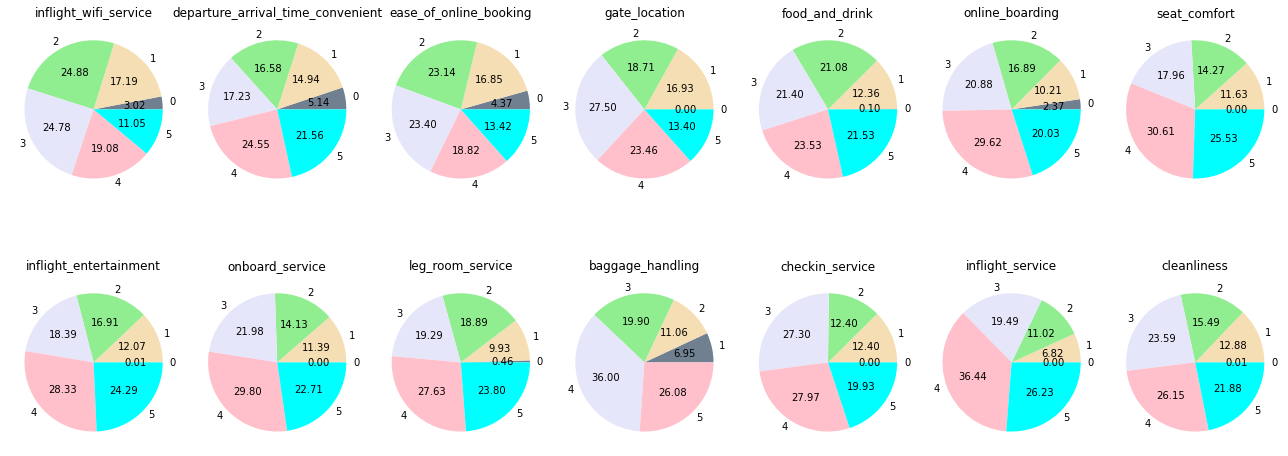

In [43]:
plt.figure(figsize=(18,8))
j = 1
for cols in con_cols.iloc[:,2:-2].columns:
    plt.subplot(2,7,j)
    plt.title(cols)
    plt.pie(df[cols].value_counts().sort_index(),labels=df[cols].value_counts().sort_index().index,autopct='%1.2f',colors=['slategrey','wheat','lightgreen','lavender','pink','aqua'])
    j += 1
plt.tight_layout()
plt.show()

### Inferences
-	<b>Inflight wifi services:</b> Majority of customers have rated 2 or 3 stars for Inflight wifi services, Only 11% of customers have given 5 star rating. On whole, only 30% customers are satisfied with inflight-wifi service.
-	<b>Ease of online booking:</b> Majority of customers have rated 2 or 3 stars, only 32% of customers are satisfied with online booking system facility
-	<b>Departure_arrival_time_convenient:</b> Majority of them rated 4 and 5 implying that only 45% of customers are satisfied with airline flight timings and might have not have faced delay. 
-	The 55% of travelers have faced flight delay issues.
-	<b>Gate Location:</b> Majority customers have given 3 or 4 as the rating, only 13% of customers has given 5 as rating.
-	On whole, 36% of travelers are satisfied with the gate location.
-	<b>Food and drink:</b> majority of 2, 3 and 5 rating in equal percentages, on whole, 45% of travelers satisfied with food and drink.
-	<b>Online boarding:</b> Many customers have rated for 4. On whole, 49% travelers are satisfied with online boarding facility.
-	<b>Seat comfort:</b> Many customers have rated for 4. On whole, 56% customers are satisfied with seat comfort.
-	<b>Inflight Entertainment:</b> Many customers have rated for 4. On whole, 52 % travelers are satisfied with inflight entertainments.
-	<b>Onboard Services:</b> Many customers have rated for 4. On whole, 52% travelers are satisfied with onboard service.
-	<b>Leg Room Services:</b> Many customers have rated for 4.On whole, 50% travelers are satisfied with leg_room_service.
-	<b>Baggage Handling:</b> Many customers have rated for 4. On whole, 62 % travelers are satisfied with baggage handling.
-	<b>Inflight Service:</b> Many customers have rated for 4.On whole, 62% travelers are satisfied with inflight_service.
-	<b>Cleanliness:</b>  Many customers have rated for 4.On whole, 47% travelers are satisfied with cleanliness.
-	<b>Checkin-service:</b> 47% travelers are satisfied with checkin-service.

### Analysing Numerical Features

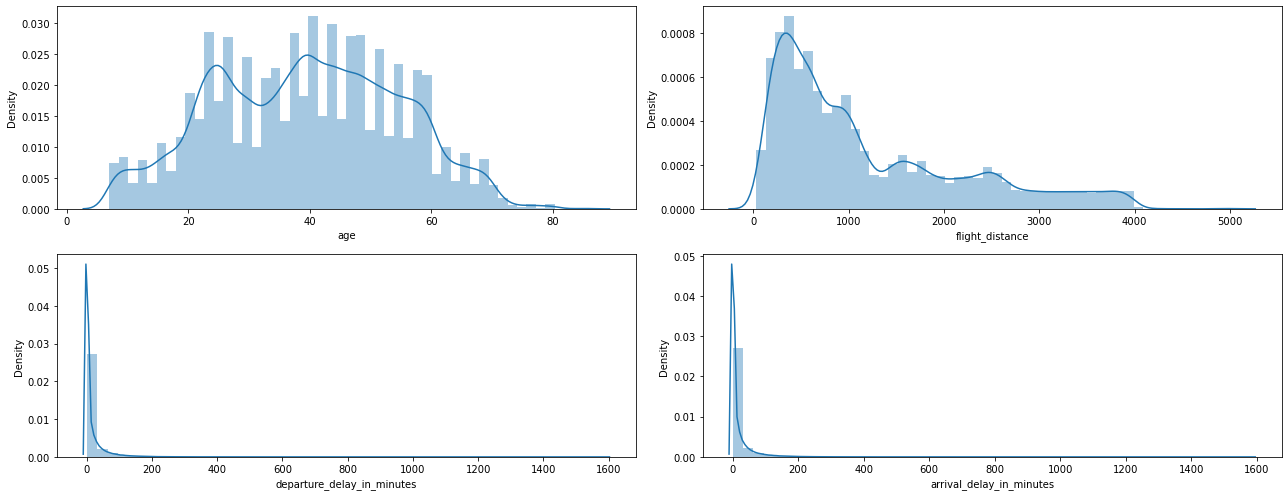

In [44]:
plt.figure(figsize=(18,7))
j=1
for cols in con_cols[['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']].columns:
    plt.subplot(2,2,j)
    sns.distplot(df[cols],kde=True)
    j+=1
plt.tight_layout()
plt.show()

<b>Inferences</b>
- The airline franchise has more travelers in the age group 22 to 57.
- More traveler have opted the airline franchise for short distance travel (10-800 miles).
- More than 50% of the travelers have not faced delay in departure and arrival time.

In [45]:
df_=df.copy()
for i in range(len(df_['departure_delay_in_minutes'])):
    if df_['departure_delay_in_minutes'].iloc[i] == 0.0:
        df_['departure_delay_in_minutes'].iloc[i]='No_Delay'
    elif df_['departure_delay_in_minutes'].iloc[i] > 0.0 and df1['departure_delay_in_minutes'].iloc[i] < 10:
        df_['departure_delay_in_minutes'].iloc[i]='1-10'
    elif df_['departure_delay_in_minutes'].iloc[i] >= 10 and df1['departure_delay_in_minutes'].iloc[i] < 50:
        df_['departure_delay_in_minutes'].iloc[i]='10-50'
    elif df_['departure_delay_in_minutes'].iloc[i] >= 50.0 and df1['departure_delay_in_minutes'].iloc[i] < 100:
        df_['departure_delay_in_minutes'].iloc[i]='50-100'
    elif df_['departure_delay_in_minutes'].iloc[i] >= 100.0 and df1['departure_delay_in_minutes'].iloc[i] < 400:
        df_['departure_delay_in_minutes'].iloc[i]='100-400'        
    elif df_['departure_delay_in_minutes'].iloc[i] >=400  and df1['departure_delay_in_minutes'].iloc[i] < 800:
        df_['departure_delay_in_minutes'].iloc[i]='400-800'
    elif df_['departure_delay_in_minutes'].iloc[i] >= 800 and df1['departure_delay_in_minutes'].iloc[i] < 1200:
        df_['departure_delay_in_minutes'].iloc[i]='800-1200'
    else:
        df_['departure_delay_in_minutes'].iloc[i]='>1200'

In [46]:
for i in range(len(df_['arrival_delay_in_minutes'])):
    if df_['arrival_delay_in_minutes'].iloc[i] == 0.0:
        df_['arrival_delay_in_minutes'].iloc[i]='No_Delay'
    elif df_['arrival_delay_in_minutes'].iloc[i] > 0.0 and df1['arrival_delay_in_minutes'].iloc[i] < 10:
        df_['departure_delay_in_minutes'].iloc[i]='1-10'
    elif df_['arrival_delay_in_minutes'].iloc[i] >= 10 and df1['arrival_delay_in_minutes'].iloc[i] < 50:
        df_['arrival_delay_in_minutes'].iloc[i]='10-50'
    elif df_['arrival_delay_in_minutes'].iloc[i] >= 50.0 and df1['arrival_delay_in_minutes'].iloc[i] < 100:
        df_['departure_delay_in_minutes'].iloc[i]='50-100'
    elif df_['arrival_delay_in_minutes'].iloc[i] >= 100.0 and df1['arrival_delay_in_minutes'].iloc[i] < 400:
        df_['arrival_delay_in_minutes'].iloc[i]='100-400'        
    elif df_['arrival_delay_in_minutes'].iloc[i] >=400  and df1['arrival_delay_in_minutes'].iloc[i] < 800:
        df_['departure_delay_in_minutes'].iloc[i]='400-800'
    elif df_['arrival_delay_in_minutes'].iloc[i] >= 800 and df1['arrival_delay_in_minutes'].iloc[i] < 1200:
        df_['arrival_delay_in_minutes'].iloc[i]='800-1200'
    else:
        df_['arrival_delay_in_minutes'].iloc[i]='>1200'

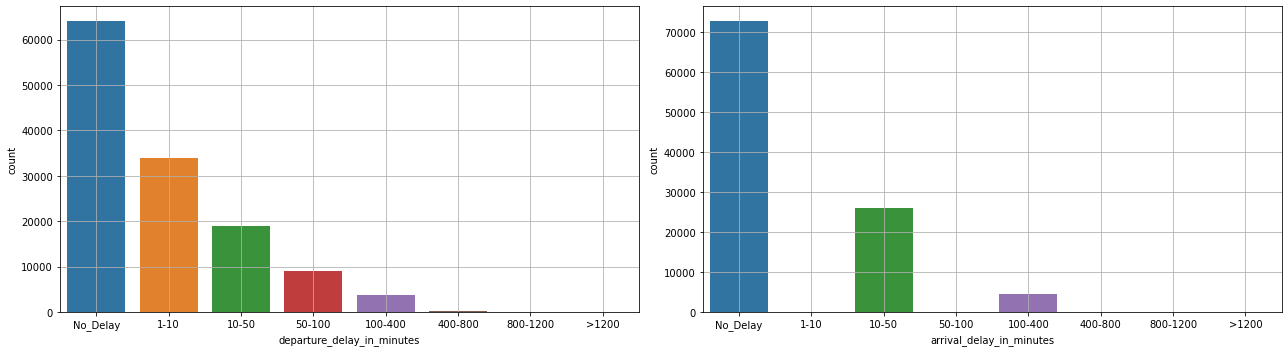

In [47]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(df_['departure_delay_in_minutes'],order=['No_Delay','1-10','10-50','50-100','100-400','400-800','800-1200','>1200'])
plt.grid()

plt.subplot(1,2,2)
sns.countplot(df_['arrival_delay_in_minutes'],order=['No_Delay','1-10','10-50','50-100','100-400','400-800','800-1200','>1200'])
plt.grid()

plt.tight_layout()
plt.show()

### Inferences
- The airline franchise has more travelers in the age group 22 to 57.
- More travelers have opted the airline franchise for short distance travel (10-800 miles).
- More than 50% of the travelers have not faced delay in departure and arrival time.

<a id="bi"></a>
## Bivariate Analysis

- <b>Bivariate analysis w.r.t target feature i.e, satisfaction.</b>

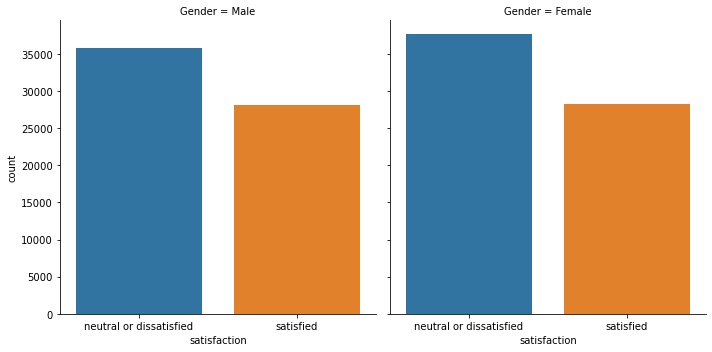

In [48]:
sns.catplot(data=df,col='Gender',x='satisfaction',kind='count')
plt.tight_layout()
plt.show()

- For both male and female passengers, number of dissatisfied passengers are on the higher in comparision to satisfied passengers.

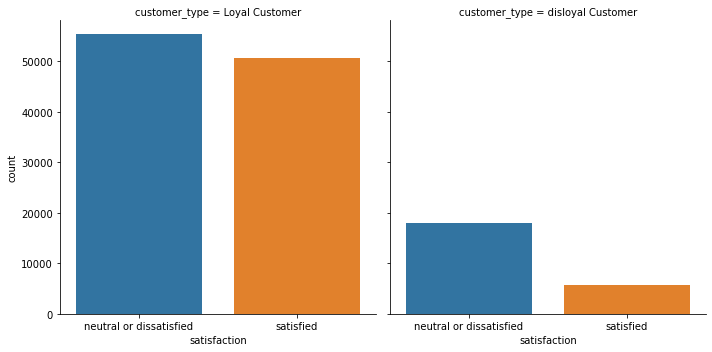

In [49]:
sns.catplot(data=df,col='customer_type',x='satisfaction',kind='count')
plt.tight_layout()
plt.show()

- For both loyal and disloyal passengers, the dissatisfaction ratio is on the higher side.

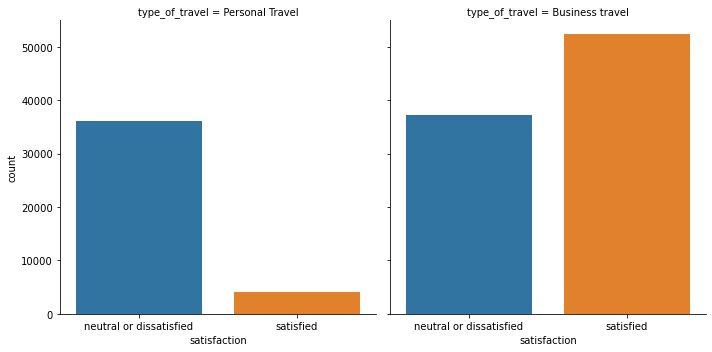

In [50]:
sns.catplot(data=df,col='type_of_travel',x='satisfaction',kind='count')
plt.tight_layout()
plt.show()

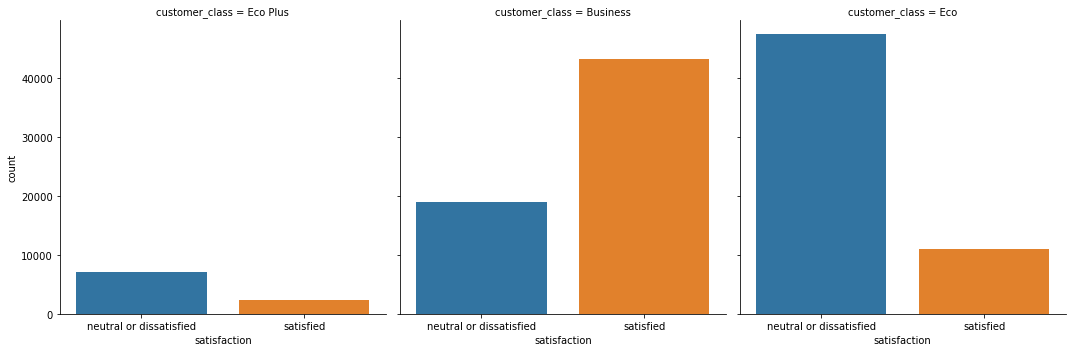

In [51]:
sns.catplot(data=df,col='customer_class',x='satisfaction',kind='count')
plt.tight_layout()
plt.show()

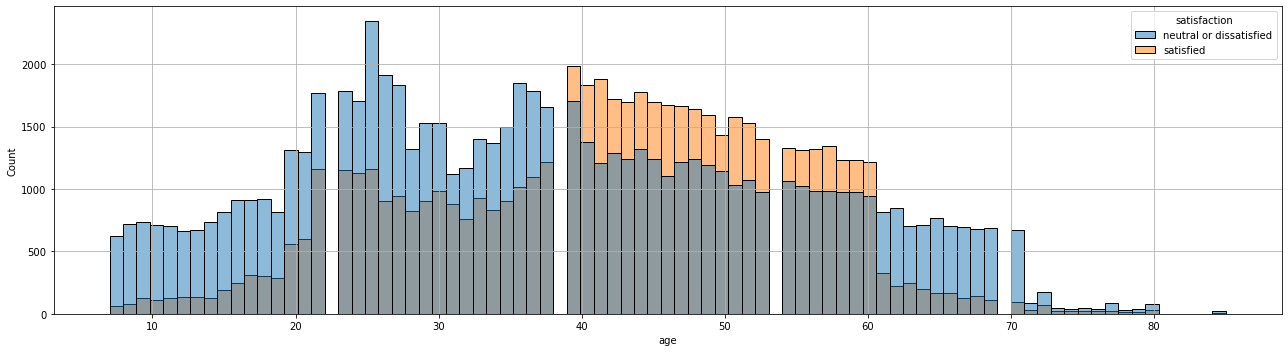

In [52]:
plt.figure(figsize=(18,5))
sns.histplot(data= df,x='age',hue='satisfaction')
plt.grid()
plt.tight_layout()
plt.show()

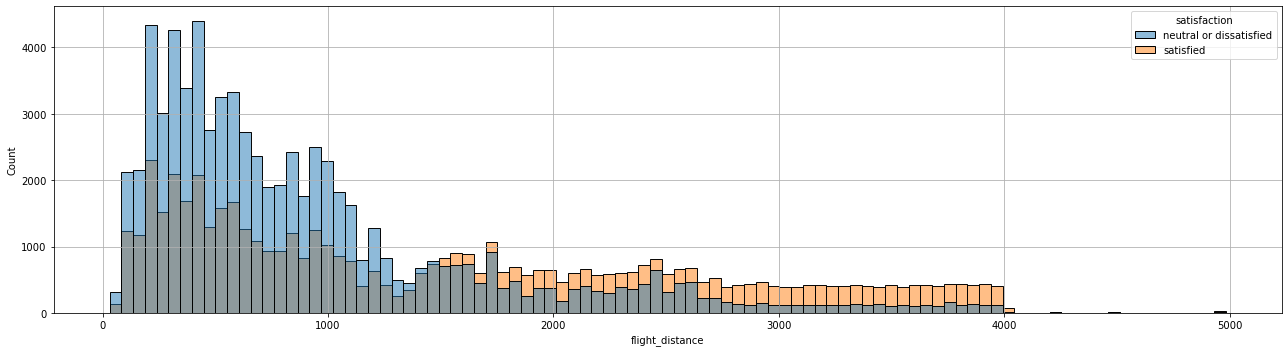

In [53]:
plt.figure(figsize=(18,5))
sns.histplot(data= df,x='flight_distance',hue='satisfaction')
plt.grid()
plt.tight_layout()
plt.show()

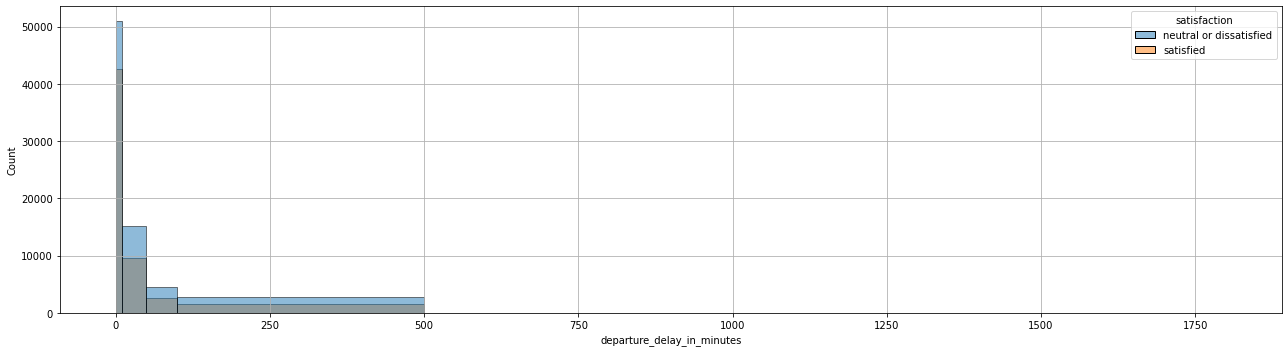

In [54]:
plt.figure(figsize=(18,5))
sns.histplot(data= df,x='departure_delay_in_minutes',hue='satisfaction',bins=[0,10,50,100,500,1000,1500,1800])
plt.grid()
plt.tight_layout()
plt.show()

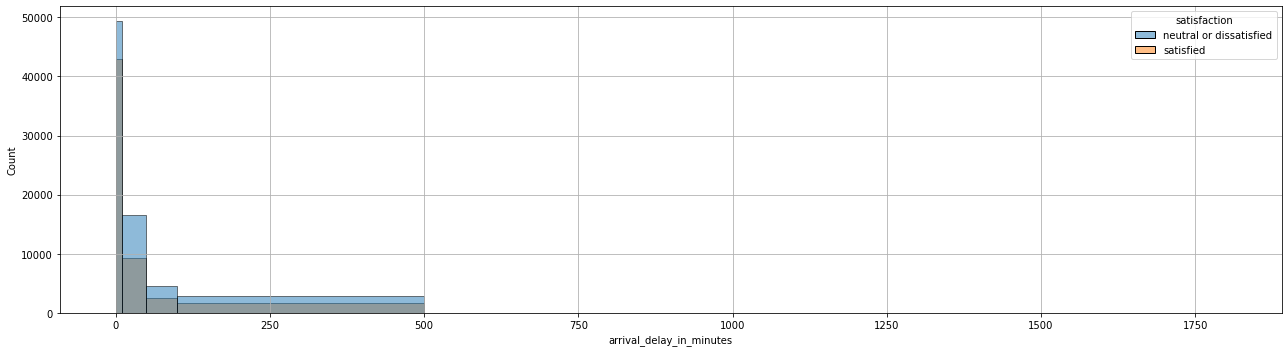

In [55]:
plt.figure(figsize=(18,5))
sns.histplot(data= df,x='arrival_delay_in_minutes',hue='satisfaction',bins=[0,10,50,100,500,1000,1500,1800])
plt.grid()
plt.tight_layout()
plt.show()

### Analysing Rating Features

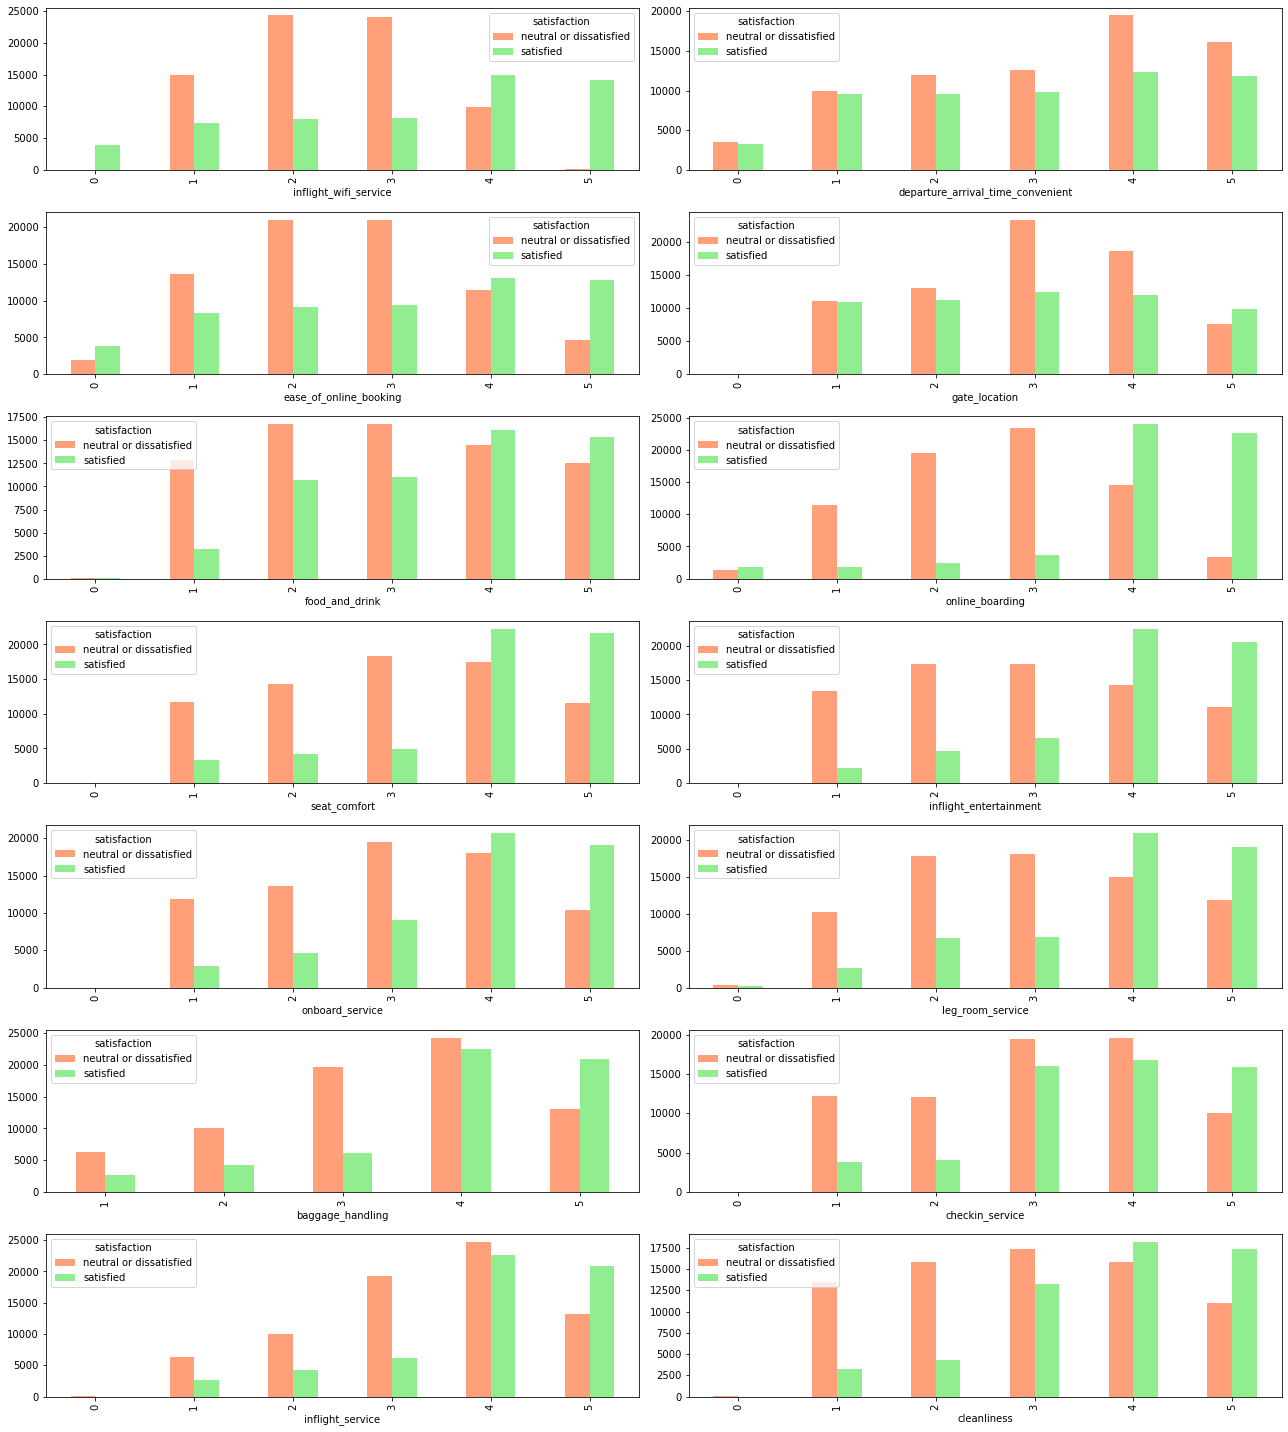

In [56]:
fig,ax=plt.subplots(7,2,figsize=(18,20))
for cols,j in zip(con_cols.iloc[:,2:-2].columns,ax.flatten()):
    
    pd.crosstab(df[cols],df['satisfaction']).plot(kind='bar',stacked=False,ax=j,color=['lightsalmon','lightgreen'])


plt.tight_layout()
plt.show()

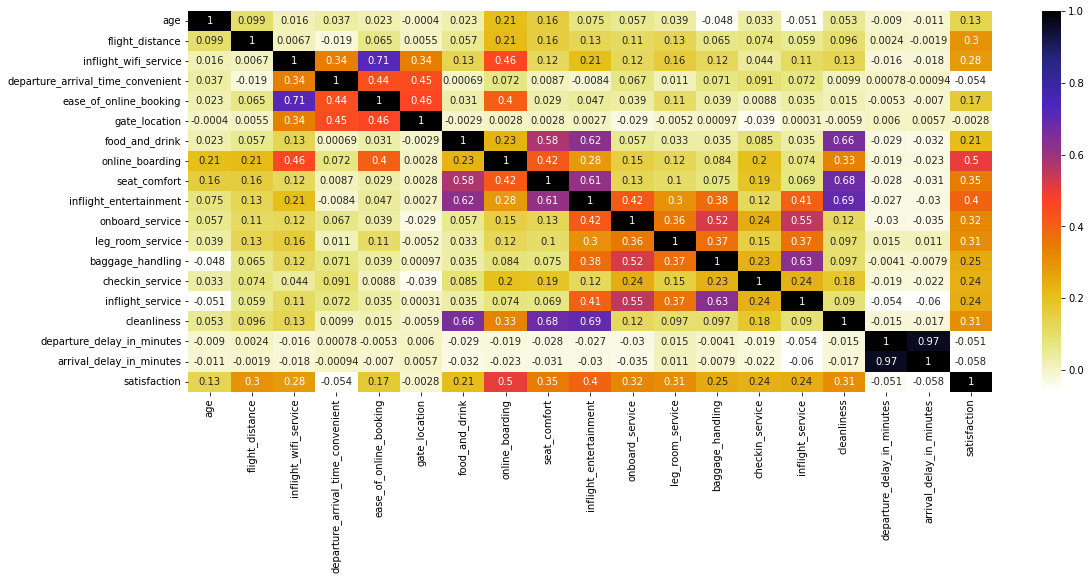

In [19]:
df1=df.copy()
df1['satisfaction']=[1 if i == 'satisfied' else 0 for i in df1['satisfaction']]
plt.figure(figsize=(18,7))
sns.heatmap(df1.corr(),annot=True,cmap='CMRmap_r')
plt.show()

<b>"Ease_of_Online_booking"</b> is highly correlated with <b>"Inflight_wifi_service"</b> and <b>"Inflight_service"</b> is highly correlated with <b>"Baggage_handling"</b>. But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

### Categorical vs Categorical Independent Features Analysis

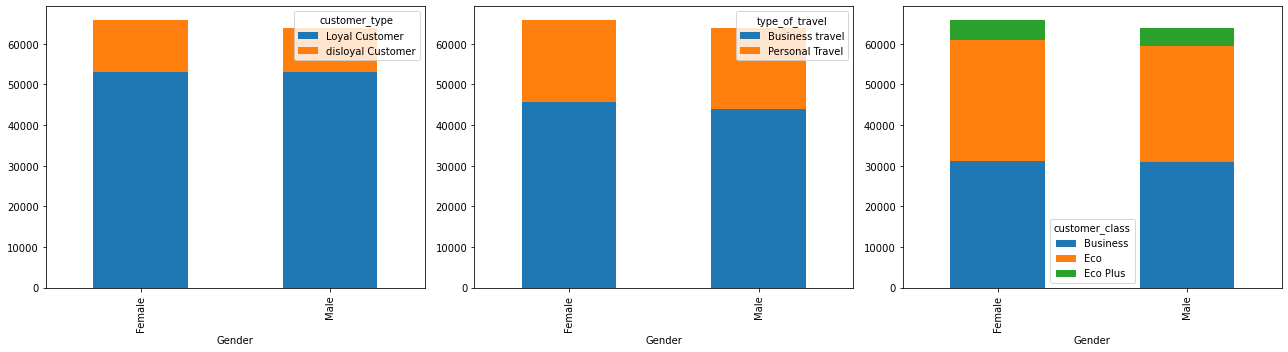

In [58]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
plt.rcParams.update({'font.size': 10})
for i,j in zip(['customer_type', 'type_of_travel', 'customer_class'],ax.flatten()):
    pd.crosstab(df['Gender'],df[i]).plot(kind='bar',stacked=True,ax=j)
    
plt.tight_layout()
plt.show()

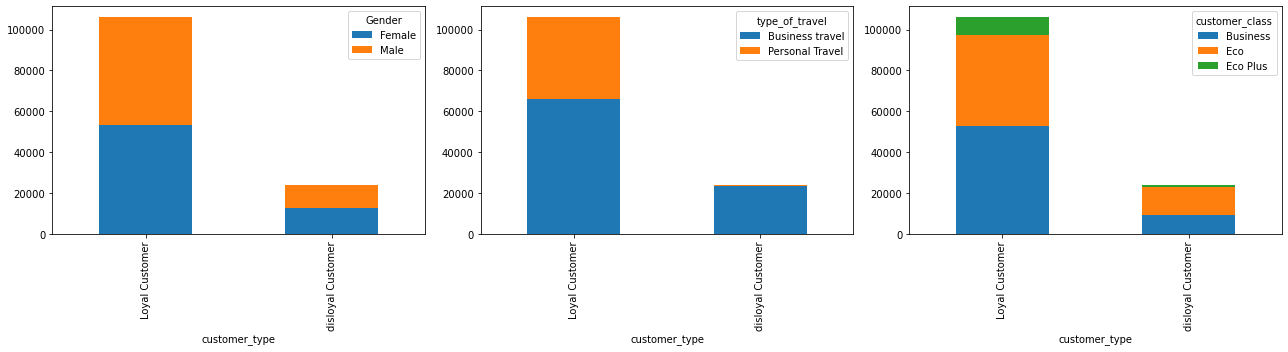

In [59]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
plt.rcParams.update({'font.size': 10})
for i,j in zip(['Gender', 'type_of_travel', 'customer_class'],ax.flatten()):
    pd.crosstab(df['customer_type'],df[i]).plot(kind='bar',stacked=True,ax=j)
    
plt.tight_layout()
plt.show()

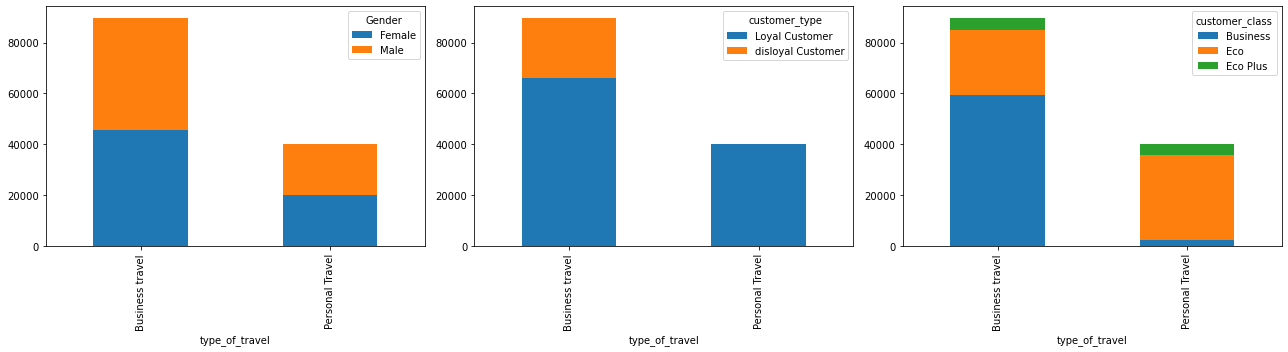

In [60]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
plt.rcParams.update({'font.size': 10})
for i,j in zip(['Gender', 'customer_type', 'customer_class'],ax.flatten()):
    pd.crosstab(df['type_of_travel'],df[i]).plot(kind='bar',stacked=True,ax=j)
    
plt.tight_layout()
plt.show()

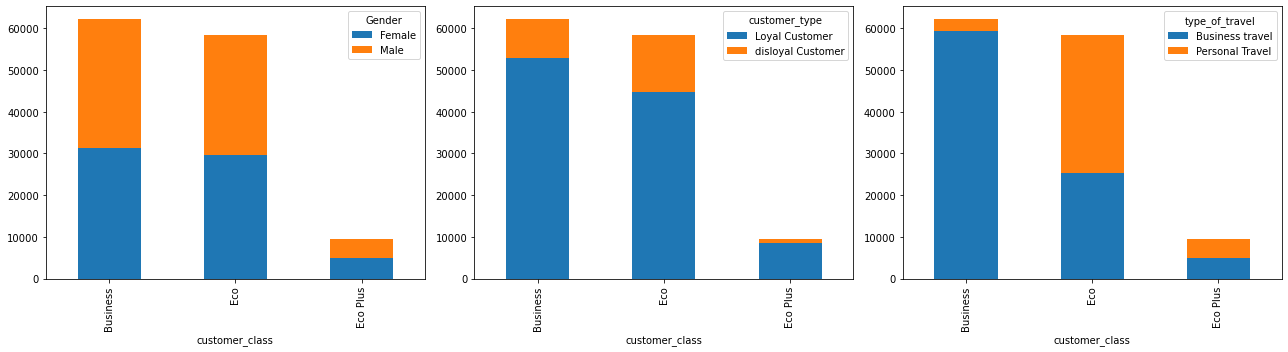

In [61]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
plt.rcParams.update({'font.size': 10})
for i,j in zip(['Gender', 'customer_type', 'type_of_travel'],ax.flatten()):
    pd.crosstab(df['customer_class'],df[i]).plot(kind='bar',stacked=True,ax=j)
    
plt.tight_layout()
plt.show()

### Inferences:
- It is observed that gender distribution in customer_types,type of travel and customer_classes are similar. 
- More % of disloyal cutomers are business travelers only.
- More % of business travelers are considered as loyal customers with the airline.
- Very less % of personal travelers are considered as disloyal customer in comparision to business travelers.
- We can observe more loyal customer traveling in eco plus class.
- There is an equal proportion of gender for Loyal and Disloyal Customers.

<a id="mul"></a>
## Multivariate Analysis

In [62]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


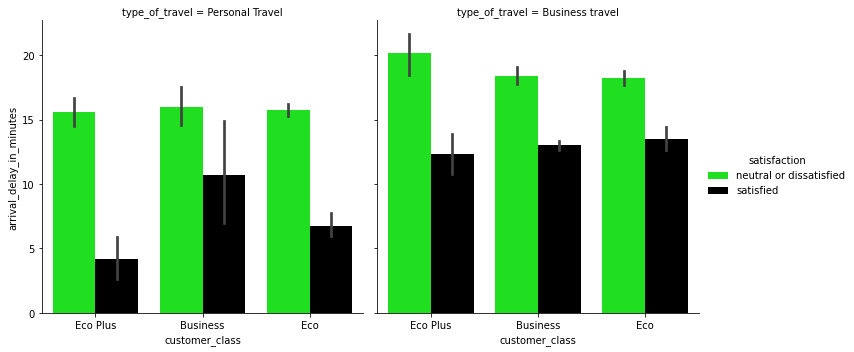

In [63]:
sns.catplot(x="customer_class", y="arrival_delay_in_minutes", hue="satisfaction", col="type_of_travel",kind='bar', data=df,palette=['lime','k'])
plt.show()

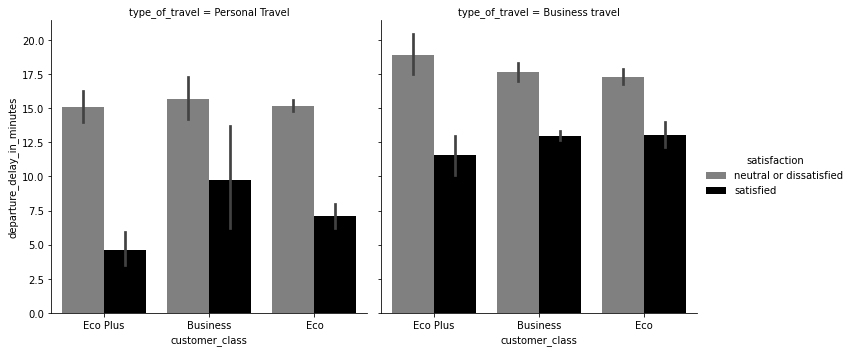

In [64]:
sns.catplot(x="customer_class", y="departure_delay_in_minutes", hue="satisfaction", col="type_of_travel", data=df, kind="bar",palette=['gray','k'])
plt.show()

- For any customer class and for any type of travel, customers are dissatisfied when there is a delay in the departure or in arrival.

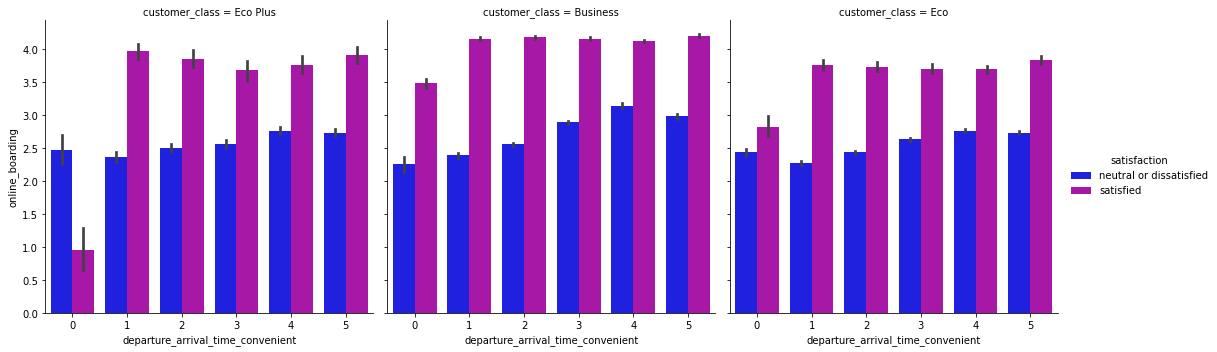

In [65]:
sns.catplot(x="departure_arrival_time_convenient", y="online_boarding", hue="satisfaction", col="customer_class", data=df, kind="bar",palette=['blue','m'])
plt.show()

- For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side. For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

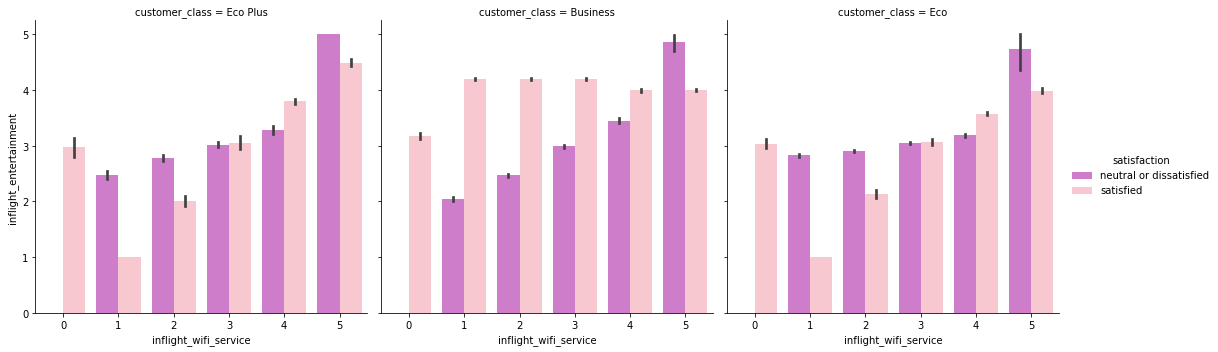

In [66]:
sns.catplot(x="inflight_wifi_service", y="inflight_entertainment", hue="satisfaction", col="customer_class", data=df, kind="bar",palette=['orchid','pink'])
plt.show()

- Eco Plus passengers are mostly satisfied without inflight wi-fi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4).
- For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them.
- For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

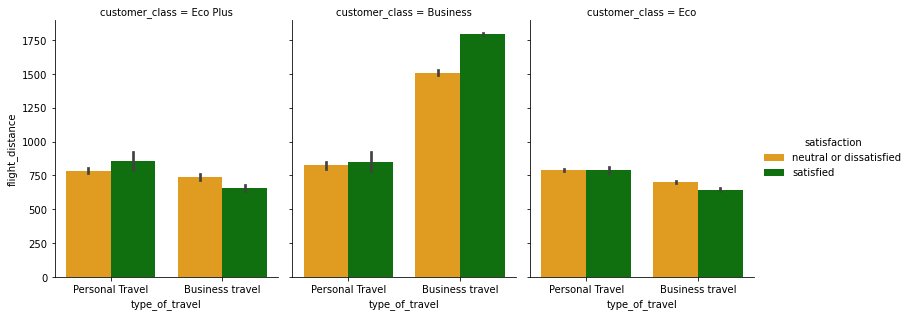

In [67]:
sns.catplot(y="flight_distance", x="type_of_travel", hue="satisfaction", col="customer_class", data=df, kind="bar", height=4.5, aspect=.8,palette=['orange','green'])
plt.show()

- For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance.
- For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

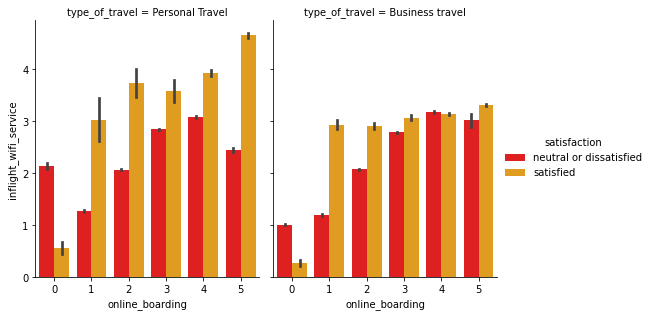

In [68]:
sns.catplot(y="inflight_wifi_service", x="online_boarding", hue="satisfaction", col="type_of_travel", data=df, kind="bar", height=4.5, aspect=.8,palette=['red','orange'])
plt.show()

- Having inflight_wifi_service with higher rating are satisfied travelers and irrespective of the rating for online boarding, personal travel type passengers are satisfied.
- With average inflight wifi service and at any level of online boarding business travel type of passengers are satisfied but people who rated for both online boarding and inflight wifi service 3 and above the ratio of satisfied to dissatisfied is near to 1.

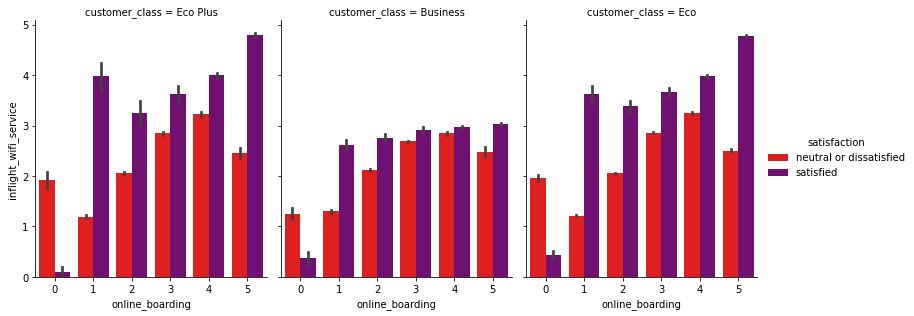

In [69]:
sns.catplot(y="inflight_wifi_service", x="online_boarding", hue="satisfaction", col="customer_class", data=df, kind="bar", height=4.5, aspect=.8,palette=['red','purple'])
plt.show()

- Customer from eco plus class are highly satisfied with both inflight wifi service and online boarding but few people who are satisfied with inflight wifi service are not satisfied with online boarding service as they given rating to 1.
- On an average customers from business class are satisfied with both inflight wifi service and online boarding as the given same rating for both.
- Customer from eco class are highly satisfied with inflight wifi service and online boarding.

<a id="data"></a>
# 4. Data Pre Processing

<a id="trans"></a>
## 4.1 Transforming Data

In [27]:
num_col = con_cols[['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']]

pt=PowerTransformer()
df_num=pd.DataFrame(pt.fit_transform(num_col),columns=num_col.columns)
df_num.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,-1.803103,-0.659289,1.335829,1.210858
1,-0.945438,-1.325978,-0.049303,0.795615
2,-0.876479,0.325113,-0.834593,-0.844226
3,-0.945438,-0.450774,1.082665,0.966370
4,1.399995,-1.415020,-0.834593,-0.844226


In [28]:
rating_cols = con_cols.drop(['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes'],axis=1)
rating_cols.head()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


<a id="onehot"></a>
## 4.2 Dummy Encoding for Categorical Features

In [29]:
dummy=pd.get_dummies(cat_cols,drop_first=True)
dummy.head()

,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


### Concatenating Transformed Continuous Columns Data With Encoded Categorical Columns Data

In [30]:
X=pd.concat([df_num,rating_cols,dummy],axis=1)
y=df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})  # mapping dissatisfied customer to 0 and satisfied to 1

In [31]:
X.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,-1.803103,-0.659289,1.335829,1.210858,3,4,3,1,5,3,5,5,4,3,4,4,5,5,1,0,1,0,1
1,-0.945438,-1.325978,-0.049303,0.795615,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,0,0,0
2,-0.876479,0.325113,-0.834593,-0.844226,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,0
3,-0.945438,-0.450774,1.082665,0.966370,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,0,0,0,0
4,1.399995,-1.415020,-0.834593,-0.844226,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0,0,0,0


In [32]:
print(df['satisfaction'].value_counts())
print(y.value_counts())

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64
0    73452
1    56428
Name: satisfaction, dtype: int64


<a id="trts"></a>
## 4.3 Splitting The Data Into Train and Test Dataset

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (103904, 23)
Shape of y_train: (103904,)
Shape of X_test: (25976, 23)
Shape of y_test: (25976,)


<a id="model"></a>
# Model Building

## Building Full Model

<a id="lr"></a>
## 1. Logistic Regression Model

In [34]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
print('Train_score: ',log_reg.score(X_train,y_train))
print('Test_score: ',log_reg.score(X_test,y_test))

Train_score:  0.8744032953495534
Test_score:  0.8750384970742223


In [105]:
ypred_proba_train=log_reg.predict_proba(X_train)[:,1]
ypred_proba_test=log_reg.predict_proba(X_test)[:,1]

### Plotting ROC_AUC Curve

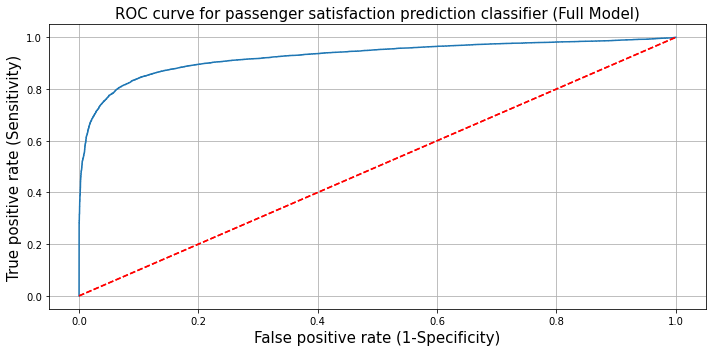

roc_auc_score:  0.927668172116178


In [106]:
plt.figure(figsize=(10,5))
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresh=roc_curve(y_test,ypred_proba_test)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]],'r--')
plt.title('ROC curve for passenger satisfaction prediction classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

print('roc_auc_score: ',roc_auc_score(y_test,ypred_proba_test))

### Determining threshold Value for Logsitic Regression Model Using Youden Index

In [107]:
roc_df = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresh})
roc_df['Youden'] = roc_df['TPR']-roc_df['FPR']
roc_df

,FPR,TPR,Threshold,Youden
0,0.000000,0.000000,1.996078,0.000000
1,0.000000,0.000088,0.996078,0.000088
2,0.000000,0.130615,0.974767,0.130615
3,0.000068,0.130615,0.974714,0.130546
4,0.000068,0.279901,0.955967,0.279833
...,...,...,...,...
4863,0.999658,0.999736,0.000680,0.000078
4864,0.999658,0.999824,0.000678,0.000166
4865,0.999932,0.999824,0.000507,-0.000108
4866,0.999932,1.000000,0.000407,0.000068


### Finding Threshold Value Where Youden Index Value Is Maximum

In [108]:
roc_df[roc_df['Youden'] == roc_df['Youden'].max()] 

,FPR,TPR,Threshold,Youden
1772,0.089249,0.832658,0.518617,0.743409


In [110]:
ypred_test=[0 if i < 0.52 else 1 for i in ypred_proba_test]

In [111]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14622
           1       0.88      0.83      0.85     11354

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
scores=cross_val_score(estimator=log_reg,X=X_train,y=y_train,cv=5,scoring='precision')
print('score: ',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

score:  [0.86578341 0.87021056 0.87315428 0.8697513  0.87144338]
Bias error: 0.1299314118792223
Variance error: 0.002810359862220045


### Building Peformance Table For Each Model

In [47]:
p_table = pd.DataFrame(columns=['Model Name','Train Accuracy','Test Accuracy','Precision Score','Recall Score','Kappa Score','F1-score'])

def performance_table(model_name,model,sfs=False):
    
    global p_table
    
    if sfs==False:
        global X_train,X_test,y_test,y_train
        ypred_train = model.predict(X_train)
        ypred_test = model.predict(X_test)
        p_table = p_table.append({'Model Name':model_name,
                                  'Train Accuracy':accuracy_score(y_train,ypred_train),
                               'Test Accuracy':accuracy_score(y_test,ypred_test),
                                'Precision Score': precision_score(y_test, ypred_test),
                                'Recall Score': recall_score(y_test, ypred_test),
                                'Kappa Score':cohen_kappa_score(y_test, ypred_test),
                                'F1-score': f1_score(y_test, ypred_test)},ignore_index=True)
        return p_table
    else:
        global X1_train,X1_test,y1_test,y1_train
        ypred_train = model.predict(X1_train)
        ypred_test = model.predict(X1_test)
        p_table = p_table.append({'Model Name':model_name,
                                  'Train Accuracy':accuracy_score(y1_train,ypred_train),
                               'Test Accuracy':accuracy_score(y1_test,ypred_test),
                                'Precision Score': precision_score(y1_test, ypred_test),
                                'Recall Score': recall_score(y1_test, ypred_test),
                                'Kappa Score':cohen_kappa_score(y1_test, ypred_test),
                                'F1-score': f1_score(y1_test, ypred_test)},ignore_index=True)
        return p_table
        

In [281]:
performance_table('Logistic_Regression_full_model',log_reg) # logistic regression model o/p using threshold 0.5 default_value

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479


<a id="gnb"></a>
## 2. Gaussian Naive Bayes

In [204]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [205]:
ypred_test_gnb = gnb.predict(X_test)
ypred_train_gnb = gnb.predict(X_train)

In [206]:
print('Accuracy For Train Data :',round(accuracy_score(y_train,ypred_train_gnb),4))
print('Accuracy For Test Data :',round(accuracy_score(y_test,ypred_test_gnb),4))

Accuracy For Train Data : 0.8655
Accuracy For Test Data : 0.8653


In [207]:
print('Classification Report For Train Data :\n\n',classification_report(y_train,ypred_train_gnb))
print('Classification Report For Test Data :\n\n',classification_report(y_test,ypred_test_gnb))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.86      0.90      0.88     58830
           1       0.87      0.82      0.84     45074

    accuracy                           0.87    103904
   macro avg       0.87      0.86      0.86    103904
weighted avg       0.87      0.87      0.86    103904

Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.86      0.90      0.88     14622
           1       0.87      0.82      0.84     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.86     25976



In [208]:
print("Confusion Matrix For Train Data :\n\n",confusion_matrix(y_train,ypred_train_gnb))
print("\n\n")
print("Confusion Matrix For Test Data :\n\n",confusion_matrix(y_test,ypred_test_gnb))

Confusion Matrix For Train Data :

 [[53152  5678]
 [ 8302 36772]]



Confusion Matrix For Test Data :

 [[13179  1443]
 [ 2057  9297]]


In [282]:
performance_table("GaussianNB",gnb)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586


<a id="knn"></a>
## 3. KNN Model

In [223]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [224]:
ypred_test_knn = knn.predict(X_test)
ypred_train_knn = knn.predict(X_train) 

In [228]:
print('Accuracy For Train Data :',round(accuracy_score(y_train,ypred_train_knn),4))
print('Accuracy For Test Data :',round(accuracy_score(y_test,ypred_test_knn),4))

Accuracy For Train Data : 0.9582
Accuracy For Test Data : 0.9239


In [229]:
print('Classification Report For Train Data :\n\n',classification_report(y_train,ypred_train_knn))
print('Classification Report For Test Data :\n\n',classification_report(y_test,ypred_test_knn))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.95      0.97      0.96     58830
           1       0.97      0.94      0.95     45074

    accuracy                           0.96    103904
   macro avg       0.96      0.96      0.96    103904
weighted avg       0.96      0.96      0.96    103904

Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.92      0.95      0.93     14622
           1       0.93      0.89      0.91     11354

    accuracy                           0.92     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [283]:
performance_table('KNeighboursClassifier',knn)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758


<a id="dt"></a>
## 4. Decision Tree Classifier

In [209]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [210]:
ypred_test_DT = DT.predict(X_test)
ypred_train_DT = DT.predict(X_train)

In [211]:
print('Accuracy For Train Data :',round(accuracy_score(y_train,ypred_train_DT),4))
print('Accuracy For Test Data :',round(accuracy_score(y_test,ypred_test_DT),4))

Accuracy For Train Data : 1.0
Accuracy For Test Data : 0.9441


In [212]:
print('Classification Report For Train Data :\n\n',classification_report(y_train,ypred_train_DT))
print('Classification Report For Test Data :\n\n',classification_report(y_test,ypred_test_DT))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58830
           1       1.00      1.00      1.00     45074

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904

Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.94      0.93      0.94     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [213]:
print("Confusion Matrix For Train Data :\n\n",confusion_matrix(y_train,ypred_train_DT))
print("\n\n")
print("Confusion Matrix For Test Data :\n\n",confusion_matrix(y_test,ypred_test_DT))

Confusion Matrix For Train Data :

 [[58830     0]
 [    0 45074]]



Confusion Matrix For Test Data :

 [[13916   706]
 [  745 10609]]


In [284]:
performance_table('DecisionTreeClassifier',DT)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992


### Cross Val Score for Decision Tree

In [362]:
dt_cv = DecisionTreeClassifier()
score1 = cross_val_score(estimator=dt_cv,X=X_train,y=y_train,cv=5,verbose=2,scoring='precision')
print("Score :",score1)
print('Bias Error:',round(1-np.mean(score1),3)) 
print('Variance Error:',round(np.std(score1)/np.mean(score1),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.5s
Score : [0.93603624 0.92984778 0.93345105 0.93664004 0.9335464 ]
Bias Error: 0.066
Variance Error: 0.003


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


### Feature Importance For Decision Tree Classifier Base Model

In [307]:
imp_feature_DT = pd.DataFrame({'column':X_train.columns,'imp':np.round(DT.feature_importances_,1)})
sorted_feature_DT = imp_feature_DT.sort_values('imp',ascending=False)
sorted_feature_DT

,column,imp
9,online_boarding,0.4
20,type_of_travel_Personal Travel,0.2
4,inflight_wifi_service,0.2
0,age,0.0
13,leg_room_service,0.0
21,customer_class_Eco,0.0
19,customer_type_disloyal Customer,0.0
18,Gender_Male,0.0
17,cleanliness,0.0
16,inflight_service,0.0


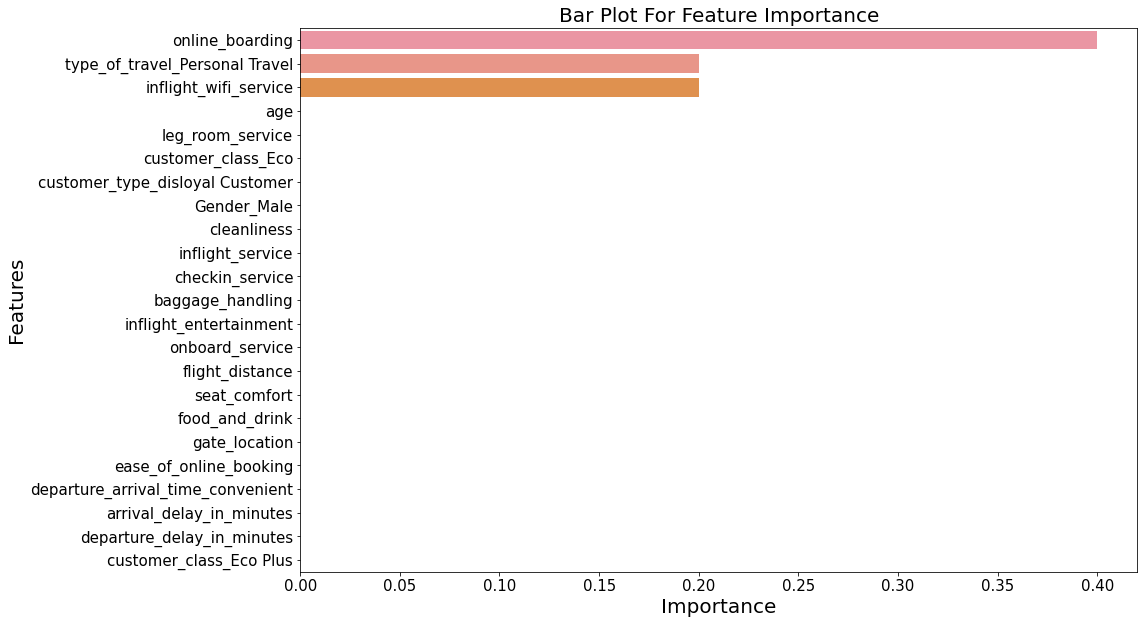

In [308]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})
sns.barplot(sorted_feature_DT['imp'],sorted_feature_DT['column'])
plt.title('Bar Plot For Feature Importance',size=20)
plt.xlabel('Importance',size=20)
plt.ylabel('Features',size=20)
plt.show()

Here only three features having importance, rest of the feature importance reduces to zero so we can select only above three features having greater than 0 importance value.

<a id="rf"></a>
## 5. Random Forest Classifier

In [214]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [215]:
ypred_test_rf = rf.predict(X_test)
ypred_train_rf = rf.predict(X_train)

In [216]:
print("Accuracy For Train Data :",accuracy_score(y_train,ypred_train_rf))
print("Accuracy For Test Data :",accuracy_score(y_test,ypred_test_rf))

Accuracy For Train Data : 1.0
Accuracy For Test Data : 0.9608869725900832


In [217]:
print("Classification Report For Train :\n\n",classification_report(y_train,ypred_train_rf))
print("\n\n")
print("Classification Report For Test :\n\n",classification_report(y_test,ypred_test_rf))

Classification Report For Train :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58830
           1       1.00      1.00      1.00     45074

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904




Classification Report For Test :

               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14622
           1       0.97      0.94      0.95     11354

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [218]:
print("Confusion Matrix For Train :\n\n",confusion_matrix(y_train,ypred_train_rf))
print("\n\n")
print("Confusion Matrix For Test :\n\n",confusion_matrix(y_test,ypred_test_rf))

Confusion Matrix For Train :

 [[58830     0]
 [    0 45074]]



Confusion Matrix For Test :

 [[14342   280]
 [  736 10618]]


In [285]:
performance_table('RandomForestClassifier',rf)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341


### Cross Val Score for Random Forest Classifier

In [365]:
rfc_cv = RandomForestClassifier()
score2 = cross_val_score(estimator=rfc_cv,X=X_train,y=y_train,cv=5,verbose=2,scoring='precision')
print("Score :",score2)
print('Bias Error:',round(1-np.mean(score2),3))
print('Variance Error:',round(np.std(score2)/np.mean(score2),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   9.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV] END .................................................... total time=   9.1s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=   9.3s
Score : [0.97116931 0.97257287 0.96919024 0.97235604 0.97305664]
Bias Error: 0.028
Variance Error: 0.001


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.8s finished


<a id="ab"></a>
## 6. AdaBoost Classifier

In [219]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [220]:
ypred_test_adb = adb.predict(X_test)
ypred_train_adb = adb.predict(X_train)

In [221]:
print("Accuracy For Train Data :",accuracy_score(y_train,ypred_train_adb))
print("Accuracy For Test Data :",accuracy_score(y_test,ypred_test_adb))

Accuracy For Train Data : 0.9273560209424084
Accuracy For Test Data : 0.9269710502001848


In [222]:
print("Classification Report For Train :\n\n",classification_report(y_train,ypred_train_adb))
print("\n\n")
print("Classification Report For Test :\n\n",classification_report(y_test,ypred_test_adb))

Classification Report For Train :

               precision    recall  f1-score   support

           0       0.93      0.94      0.94     58830
           1       0.92      0.91      0.92     45074

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904




Classification Report For Test :

               precision    recall  f1-score   support

           0       0.93      0.95      0.94     14622
           1       0.93      0.90      0.92     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [286]:
performance_table('AdaBoostClassifier',adb)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384


### Checking Best Model By Using Cross Val Score

In [117]:
models = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
model_performance = pd.DataFrame(columns=['Model','Accuracy Score'])
for m in models:
    model = m
    score = cross_val_score(estimator=model,X=X_train,y=y_train,scoring="accuracy",cv=5,verbose=2)
    model_performance = model_performance.append({'Model':str(m)[:-2],'Accuracy Score':np.mean(score)},ignore_index=True)
print(model_performance)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END .................................................... total time=   0.9s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  43.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s remaining:    0.0s


[CV] END .................................................... total time=  41.1s
[CV] END .................................................... total time=  43.9s
[CV] END .................................................... total time=  42.5s
[CV] END .................................................... total time=  42.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   8.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.8s
[CV] END .................................................... total time=   8.8s
[CV] END .................................................... total time=   8.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.4s
[CV] END .................................................... total time=   3.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  13.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


[CV] END .................................................... total time=  12.8s
[CV] END .................................................... total time=  12.9s
[CV] END .................................................... total time=  12.8s
[CV] END .................................................... total time=  12.8s
                        Model  Accuracy Score
0          LogisticRegression        0.874615
1        KNeighborsClassifier        0.925114
2      RandomForestClassifier        0.961830
3      DecisionTreeClassifier        0.944045
4          AdaBoostClassifier        0.927212
5  GradientBoostingClassifier        0.941533


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


<b>So from all classification model we got maximum accuracy with Random Forest Classifier thus we select as final model for our dataset.</b>

<a id="tunerf"></a>
## Hyperparameter Tunning For Random Forest Classifier

In [122]:
tune = [{'n_estimators':[80,100,120],
        'max_depth':[2,4,6],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[2,4,6],
        'criterion':['gini','entropy']}]

In [130]:
rfc1 = RandomForestClassifier(random_state=2)
grid = GridSearchCV(estimator=rfc1,param_grid=tune,cv=5,scoring='precision')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 4, 6],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [80, 100, 120]}],
             scoring='precision')

In [132]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 80}

In [134]:
rfc_tune = RandomForestClassifier(n_estimators=80,min_samples_split=2,min_samples_leaf=6,max_depth=6,criterion='entropy')
rfc_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       n_estimators=80)

In [135]:
ypred_train_rfc_tune = rfc_tune.predict(X_train)
ypred_test_rfc_tune = rfc_tune.predict(X_test)

In [136]:
print("Classification Report For Train Data :\n\n",classification_report(y_train,ypred_train_rfc_tune))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y_test,ypred_test_rfc_tune))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.93      0.94      0.94     58830
           1       0.93      0.91      0.92     45074

    accuracy                           0.93    103904
   macro avg       0.93      0.93      0.93    103904
weighted avg       0.93      0.93      0.93    103904



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.93      0.94      0.94     14622
           1       0.92      0.91      0.91     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



In [287]:
performance_table('Tunned Random Forest Clasifier',rfc_tune)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926


### Cross Val Score for Tunned Random Forest Classifier

In [364]:
rfc_tune_cv = RandomForestClassifier(n_estimators=80,min_samples_split=2,min_samples_leaf=6,max_depth=6,criterion='entropy')
score3 = cross_val_score(estimator=rfc_tune_cv,X=X_train,y=y_train,cv=5,verbose=2,scoring='precision')
print("Score :",score3)
print('Bias Error:',round(1-np.mean(score3),3))
print('Variance Error:',round(np.std(score3)/np.mean(score3),3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   4.1s
[CV] END .................................................... total time=   4.1s
Score : [0.92503133 0.93131336 0.92846583 0.93047945 0.93171731]
Bias Error: 0.071
Variance Error: 0.003


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.0s finished


## Feature Selection For Tunned Random Forest Classifier Using Feature Importance

In [312]:
imp_feature = pd.DataFrame({"column":X_train.columns,"imp":np.round(rfc_tune.feature_importances_,1)})
sorted_feature = imp_feature.sort_values('imp',ascending=False)
sorted_feature

,column,imp
9,online_boarding,0.3
4,inflight_wifi_service,0.2
11,inflight_entertainment,0.1
21,customer_class_Eco,0.1
20,type_of_travel_Personal Travel,0.1
13,leg_room_service,0.0
19,customer_type_disloyal Customer,0.0
18,Gender_Male,0.0
17,cleanliness,0.0
16,inflight_service,0.0


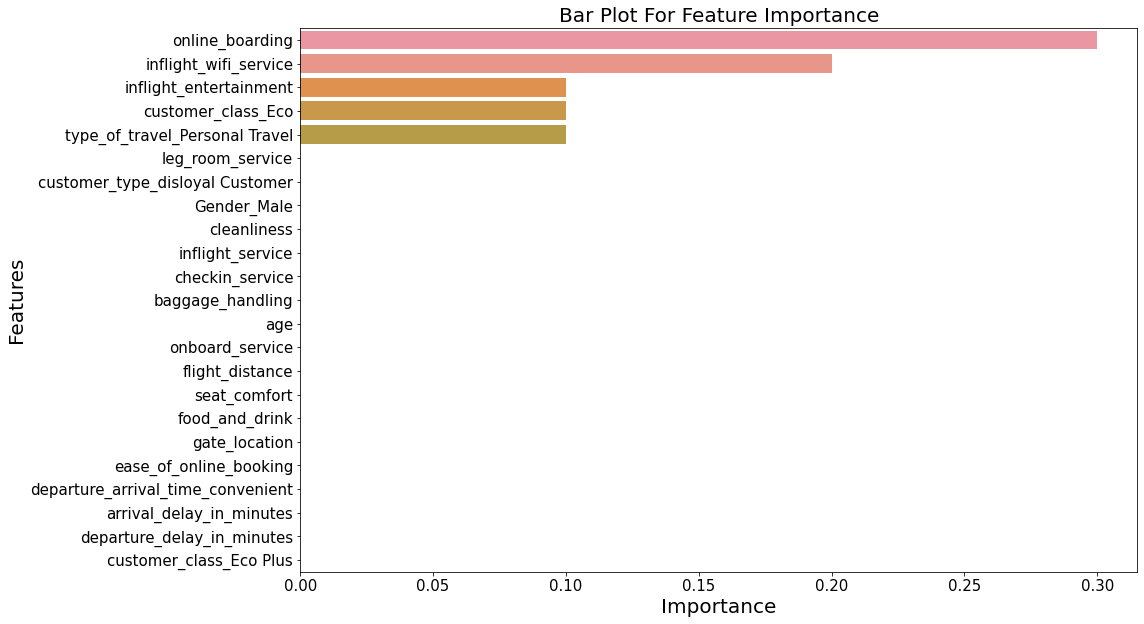

In [313]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})
sns.barplot(sorted_feature['imp'],sorted_feature['column'])
plt.title('Bar Plot For Feature Importance',size=20)
plt.xlabel('Importance',size=20)
plt.ylabel('Features',size=20)
plt.show()

Here only five feature having feature importance rest of the features having zero feature importance, so we can choose only five features having importance and all ohter can be dropped.

### Selecting Features Using Feature Importance

In [325]:
selected_feature = list(imp_feature[imp_feature['imp']>0].sort_values('imp',ascending=False)['column'].values)
selected_feature # top 5 feature selecting as maximum feature importance value

['online_boarding',
 'inflight_wifi_service',
 'inflight_entertainment',
 'type_of_travel_Personal Travel',
 'customer_class_Eco']

### Splitting Selected Feature Data

In [37]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [39]:
top5_features=df[['online_boarding','inflight_wifi_service','inflight_entertainment','type_of_travel','customer_class']]
X1=pd.get_dummies(top5_features,columns=['type_of_travel','customer_class'],drop_first=True)
X1.head()

,online_boarding,inflight_wifi_service,inflight_entertainment,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus
0,3,3,5,1,0,1
1,3,3,1,0,0,0
2,5,2,5,0,0,0
3,2,2,2,0,0,0
4,5,3,3,0,0,0


In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.3,random_state=1)

### Building Random Forest Model With Selected Feature

In [41]:
rfc_sf = RandomForestClassifier(random_state=2)
rfc_sf.fit(X1_train,y1_train)

RandomForestClassifier(random_state=2)

In [42]:
ypred_train_rfc_sf = rfc_sf.predict(X1_train)
ypred_test_rfc_sf = rfc_sf.predict(X1_test)

In [43]:
print("Classification Report For Train Data :\n\n",classification_report(y1_train,ypred_train_rfc_sf))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y1_test,ypred_test_rfc_sf))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.93      0.95      0.94     51272
           1       0.93      0.90      0.92     39644

    accuracy                           0.93     90916
   macro avg       0.93      0.92      0.93     90916
weighted avg       0.93      0.93      0.93     90916



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.92      0.94      0.93     22180
           1       0.93      0.90      0.91     16784

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



In [334]:
performance_table('Random Forest Clasifier with Top 5 Features',rfc_sf,sfs=True)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


### Hyperparameter Tunning With Selected Feature Data

In [48]:
tune = [{'n_estimators':[80,100,120],
        'max_depth':[2,4,6],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[2,4,6],
        'criterion':['gini','entropy']}]

In [46]:
rfc_sf1 = RandomForestClassifier(random_state=2)
grid_sf = GridSearchCV(estimator=rfc_sf1,param_grid=tune,cv=5,scoring='precision')
grid_sf.fit(X1_train,y1_train)
grid_sf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

In [49]:
rfc_sf_tune = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=6,min_samples_leaf=2,min_samples_split=2)
rfc_sf_tune.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, n_estimators=80)

In [50]:
ypred_train_rfc_sf_tune = rfc_sf_tune.predict(X1_train)
ypred_test_rfc_sf_tune = rfc_sf_tune.predict(X1_test)

In [51]:
print("Classification Report For Train Data :\n\n",classification_report(y1_train,ypred_train_rfc_sf_tune))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y1_test,ypred_test_rfc_sf_tune))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.91      0.93      0.92     51272
           1       0.90      0.88      0.89     39644

    accuracy                           0.91     90916
   macro avg       0.91      0.90      0.91     90916
weighted avg       0.91      0.91      0.91     90916



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.91      0.92      0.92     22180
           1       0.90      0.88      0.89     16784

    accuracy                           0.91     38964
   macro avg       0.90      0.90      0.90     38964
weighted avg       0.91      0.91      0.91     38964



In [338]:
performance_table('Tunned RandomForestClasifier with Top 5 Feature',rfc_sf_tune,sfs=True)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


In [53]:
performance_table('Tunned RandomForestClasifier with Top 5 Feature',rfc_sf_tune,sfs=True)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Tunned RandomForestClasifier with Top 5 Feature,0.927010,0.924956,0.925153,0.898475,0.846439,0.911619
1,Tunned RandomForestClasifier with Top 5 Feature,0.907442,0.905451,0.898467,0.879945,0.806720,0.889110


<a id="tuneknn"></a>
## Hyperparameter Tunning For KNN Classifier

In [240]:
tune = [{'n_neighbors':[3,5,7],'weights':['uniform','distance']}]

In [241]:
knn1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn1,param_grid=tune,cv=5,scoring='precision')
grid.fit(X_train,y_train)
grid.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [242]:
knn_tune = KNeighborsClassifier(n_neighbors=7,weights='uniform')
knn_tune.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [243]:
ypred_train_knn_tune = knn_tune.predict(X_train)
ypred_test_knn_tune = knn_tune.predict(X_test)

In [244]:
print("Classification Report For Train Data :\n\n",classification_report(y_train,ypred_train_knn_tune))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y_test,ypred_test_knn_tune))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.94      0.97      0.95     58830
           1       0.96      0.91      0.93     45074

    accuracy                           0.94    103904
   macro avg       0.95      0.94      0.94    103904
weighted avg       0.94      0.94      0.94    103904



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.92      0.96      0.94     14622
           1       0.94      0.89      0.91     11354

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [339]:
performance_table('Tunned KNN Clasifier',knn_tune)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


<a id="tunedt"></a>
## Hyperparameter Tunning For Decision Tree Classifier

In [256]:
tune = [{'criterion':['gini','entropy'],
         'splitter':['best','random'],
        'max_depth':[2,4,6],
        'min_samples_leaf':[2,4,6],
        'min_samples_split':[2,4,6],
        'max_features':['auto','log2','sqrt']}]

In [257]:
DT1 = DecisionTreeClassifier()
grid = GridSearchCV(estimator=DT1,param_grid=tune,cv=5,scoring='precision')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'best'}

In [258]:
DT_tune = DecisionTreeClassifier(criterion='gini',max_depth=6,max_features='auto',min_samples_leaf=6,min_samples_split=4,splitter='best')
DT_tune.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto', min_samples_leaf=6,
                       min_samples_split=4)

In [259]:
ypred_train_DT_tune = DT_tune.predict(X_train)
ypred_test_DT_tune = DT_tune.predict(X_test)

In [260]:
print("Classification Report For Train Data :\n\n",classification_report(y_train,ypred_train_DT_tune))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y_test,ypred_test_DT_tune))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.89      0.89      0.89     58830
           1       0.86      0.86      0.86     45074

    accuracy                           0.88    103904
   macro avg       0.87      0.87      0.87    103904
weighted avg       0.88      0.88      0.88    103904



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.88      0.88      0.88     14622
           1       0.85      0.85      0.85     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [340]:
performance_table('Tunned DecisionTreeClasifier',DT_tune)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


## Feature Selection For Tunned Decision Tree Using Feature Importance

In [344]:
imp_feature_DT_tune = pd.DataFrame({'column':X_train.columns,'imp':np.round(DT_tune.feature_importances_,1)})
sorted_feature_DT_tune = imp_feature_DT_tune.sort_values('imp',ascending=False)
sorted_feature_DT_tune

,column,imp
9,online_boarding,0.3
13,leg_room_service,0.2
21,customer_class_Eco,0.1
20,type_of_travel_Personal Travel,0.1
4,inflight_wifi_service,0.1
0,age,0.0
19,customer_type_disloyal Customer,0.0
18,Gender_Male,0.0
17,cleanliness,0.0
16,inflight_service,0.0


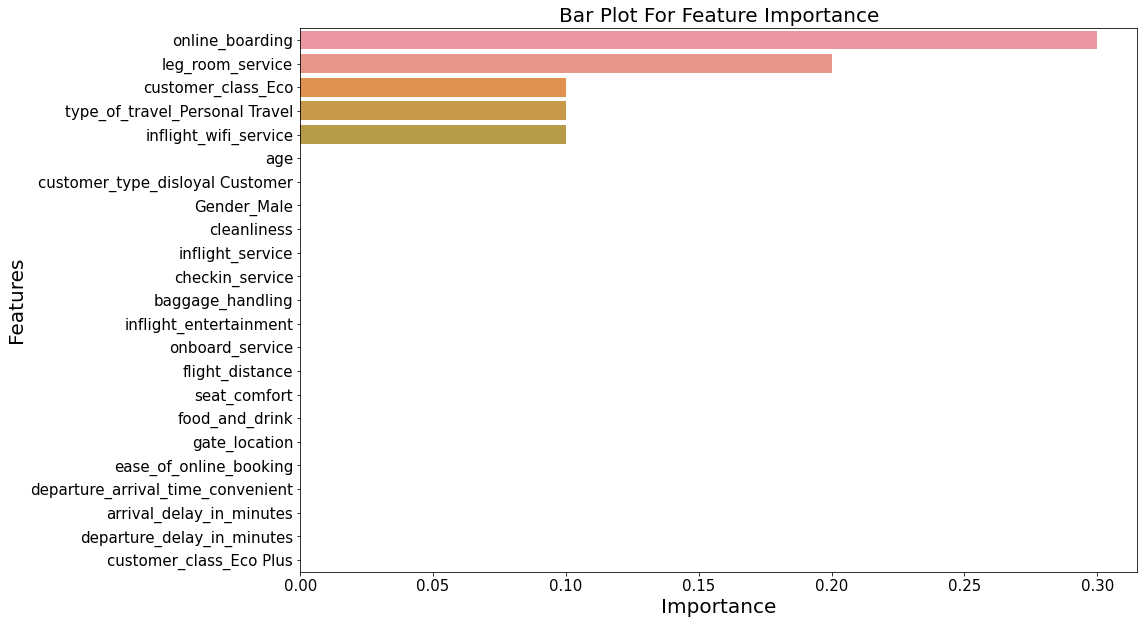

In [345]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})
sns.barplot(sorted_feature_DT_tune['imp'],sorted_feature_DT_tune['column'])
plt.title('Bar Plot For Feature Importance',size=20)
plt.xlabel('Importance',size=20)
plt.ylabel('Features',size=20)
plt.show()

So here we can see top five feature having more than zero importance and rest of the feature's importance get reduces to zero so we can drop those feature having zero importance and keep five features with importance in feature variables data.

### Selecting Features Using Feature Importance

In [347]:
selected_feature_DT_tune = list(imp_feature_DT_tune[imp_feature_DT_tune['imp']>0].sort_values('imp',ascending=False)['column'].values)
selected_feature_DT_tune

['online_boarding',
 'leg_room_service',
 'inflight_wifi_service',
 'type_of_travel_Personal Travel',
 'customer_class_Eco']

### Splitting Selected Feature Data

In [348]:
X1 = X[selected_feature_DT_tune]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.3,random_state=1)

### Building Decision Tree With Selected Feature

In [349]:
DT_sf = DecisionTreeClassifier()
DT_sf.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [350]:
ypred_train_DT_sf = DT_sf.predict(X1_train)
ypred_test_DT_sf = DT_sf.predict(X1_test)

In [351]:
print("Classification Report For Train Data :\n\n",classification_report(y1_train,ypred_train_DT_sf))
print("\n")
print("Classification Report For Test Data :\n\n",classification_report(y1_test,ypred_test_DT_sf))

Classification Report For Train Data :

               precision    recall  f1-score   support

           0       0.93      0.92      0.93     51272
           1       0.90      0.91      0.91     39644

    accuracy                           0.92     90916
   macro avg       0.92      0.92      0.92     90916
weighted avg       0.92      0.92      0.92     90916



Classification Report For Test Data :

               precision    recall  f1-score   support

           0       0.93      0.93      0.93     22180
           1       0.90      0.91      0.90     16784

    accuracy                           0.92     38964
   macro avg       0.92      0.92      0.92     38964
weighted avg       0.92      0.92      0.92     38964



In [352]:
performance_table('DecisionTreeClasifier with Top 5 Features',DT_sf,sfs=True)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


### Model Performance Table With Highlighted Maximum Precision Value

In [366]:
p_table.style.highlight_max(['Precision Score'],axis=0)

,Model Name,Train Accuracy,Test Accuracy,Precision Score,Recall Score,Kappa Score,F1-score
0,Logistic_Regression_full_model,0.874413,0.875038,0.870161,0.839352,0.745049,0.854479
1,GaussianNB,0.865453,0.865260,0.865642,0.818830,0.724522,0.841586
2,KNeighboursClassifier,0.958211,0.923930,0.934650,0.888057,0.844547,0.910758
3,DecisionTreeClassifier,1.000000,0.944141,0.937605,0.934384,0.886441,0.935992
4,RandomForestClassifier,1.000000,0.960887,0.974307,0.935177,0.920158,0.954341
5,AdaBoostClassifier,0.927356,0.926971,0.927338,0.903734,0.851170,0.915384
6,Tunned Random Forest Clasifier,0.928857,0.926317,0.923546,0.906465,0.849953,0.914926
7,Random Forest Clasifier with Top 3 Features,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
8,Tunned RandomForestClasifier with Top 3 Feature,0.891460,0.890283,0.859516,0.890908,0.777266,0.874931
9,Random Forest Clasifier with Top 5 Features,0.925833,0.923827,0.922043,0.899190,0.844206,0.910473


In [367]:
# p_table.to_excel('modal_scores.xlsx')

<a id="plot"></a>
### Bar Plot For Precision Score For Each Model

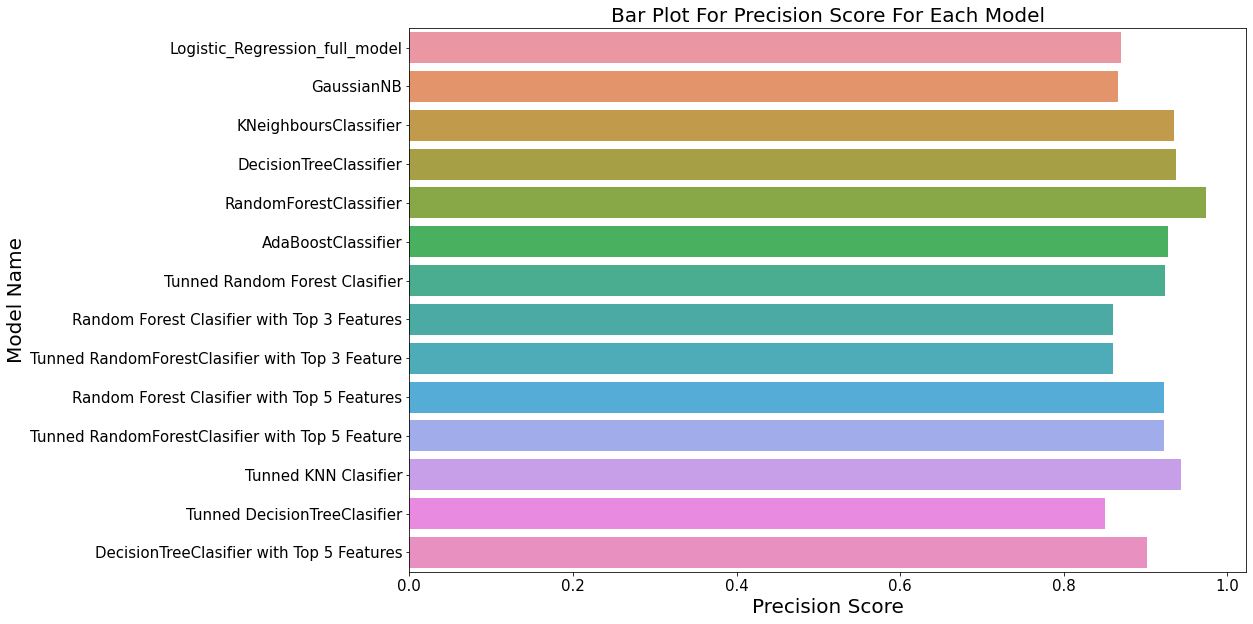

In [356]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})
sns.barplot(y=p_table['Model Name'],x=p_table['Precision Score'])
plt.title('Bar Plot For Precision Score For Each Model',size=20)
plt.xlabel('Precision Score',size=20)
plt.ylabel('Model Name',size=20)
plt.show()